In [ ]:
##

In [294]:
import matplotlib.pyplot as plt
import matplotlib
from surgeon_recording.reader import Reader
from glob import glob
from os.path import join
import os
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy
import pandas as pd
from scipy import signal as sp
import math
import cv2
import csv
from natsort import natsorted
from surgeon_recording.synchronization import Synchro
#%matplotlib widget

from plotly import subplots

import plotly.graph_objects as go
import plotly.express as px
 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [295]:
reader = Reader()

In [296]:
#data_folder = join('..', 'data_exp')

subject_list = ['1','2','3','4','5','6','7','8','9','10','11','12']
#subject_list = ['3']
segment_list = ['500','510','530','540','541','560']
#segment_list = ['560']

blacklist = []
#blacklist = ['1/run2', '3/run3', '3/run5']
#blacklist = ['7/run2']
#blacklist = [join(data_folder, x) for x in blacklist]

#specialty_keys = ["neuro", "plastic", "general", "none", "maxilo"]
expertise_keys = ["novice", "expert"]

sensors = ['optitrack', 'emg', 'TPS_calibrated']


tools_tweezer = ['tweezer_x', 'tweezer_y', 'tweezer_z']
tools_scissors = ['scissors_x', 'scissors_y', 'scissors_z'] 
#tools_verif_holder = ['needle_holder_x', 'needle_holder_y', 'needle_holder_z'] #subject 1
tools_verif_holder = ['needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z'] #subject 2 to 12

path_to_data_folder = '/home/anaelle/git/surgeon_recording/data_exp'                 #lasa computer


In [297]:
data_segments = {}
mean_segments = {}
emg_segment_subject={}
tps_segment_subject={}
abs_diff_tps = {}
range_raw_tps_subject = {}

recording_session = {}
run_list = {}
run_list_emg = {}

headers = {}
file_list = {}


run_list_emg['1'] = ['1','2', '3','4','5']
run_list_emg['2'] = ['1','3','4','6','7']
run_list_emg['3'] = ['2','3','6', '7']
run_list_emg['4'] = ['1','3','4','5','6']
run_list_emg['5'] = ['3', '5']
run_list_emg['6'] = ['1','5']
run_list_emg['7'] = ['1','3','4','6','7']
run_list_emg['8'] = ['3','4', '6']
run_list_emg['9'] = ['2','3','5', '7']
run_list_emg['10'] = ['1','2','4','5','6']
run_list_emg['11'] = ['3','4', '5']
run_list_emg['12'] = ['1','2','3']
"""
run_list['1'] = ['1','2', '3','4','5']
run_list['2'] = ['1','3','4','6','7']
run_list['3'] = ['2','3','4','6', '7']
run_list['4'] = ['1','3','4','5','6']
run_list['5'] = ['3', '5']
run_list['6'] = ['1','3','5']
run_list['7'] = ['1','3','4','6','7']
run_list['8'] = ['1','2','3','4', '6']
run_list['9'] = ['2','3','5', '7']
run_list['10'] = ['1','2','4','5','6']
run_list['11'] = ['1','3','4','5']
run_list['12'] = ['1','2','3']"""

run_list = {}
for subject in subject_list:
    run_list[subject] = {}

for segment in segment_list:
    run_list['1'][segment] = ['1','2', '3','4','5']
    run_list['2'][segment] = ['1','3','4','6','7']
    run_list['3'][segment] = ['2','3','4','6', '7']
    run_list['4'][segment] = ['1','3','4','5','6']
    
    run_list['7'][segment] = ['1','3','4','6','7']
    
    run_list['8'][segment] = ['1','2','3','4', '6']
    
    run_list['10'][segment] = ['1','2','4','5','6']
    run_list['12'][segment] = ['1','2','3']
    run_list['11'][segment] = ['1','3','4','5']


run_list['5']['500'] = ['3', '5', '6']
run_list['5']['510'] = ['1','3', '5', '6']
run_list['5']['530'] = ['1','3', '5', '6']
run_list['5']['540'] = ['1','3', '5', '6']
run_list['5']['541'] = ['1','3', '5', '6']
run_list['5']['560'] = ['1','3', '5']


run_list['6']['500'] = ['1','2','3','5']
run_list['6']['510'] = ['1','2','3','5']
run_list['6']['530'] = ['1','2','3','5']
run_list['6']['541'] = ['1','2','3','5']
run_list['6']['540'] = ['1','2','5']
run_list['6']['560'] = ['1','3','5']




run_list['9']['540'] = ['2','3','5', '7']
run_list['9']['541'] = ['2','3','5', '7'] 
run_list['9']['560'] = ['2','3','5', '7']
run_list['9']['500'] = ['2','3','4','5', '7']
run_list['9']['510'] = ['2','3','4','5', '7']
run_list['9']['530'] = ['2','3','4','5', '7']




recording_session['1'] = '70622'
recording_session['2'] = '70622'
recording_session['3'] = '80622'
recording_session['4'] = '80622'
recording_session['5'] = '80622'
recording_session['6'] = '90622'
recording_session['7'] = '90622'
recording_session['8'] = '90622'
recording_session['9'] = '90622'
recording_session['10']= '100622'
recording_session['11']= '100622'
recording_session['12']= '100622'



for subject in subject_list:
    data_segments[subject] = {}
    mean_segments[subject]= {}
    file_list[subject] = {}
    emg_segment_subject[subject] = {}
    tps_segment_subject[subject] = {}
    
    abs_diff_tps[subject] = {}
    range_raw_tps_subject[subject] = {}
    
    for segment in segment_list:
        data_segments[subject][segment]= {}
        file_list[subject][segment] = {}
        mean_segments[subject][segment]= {}

        emg_segment_subject[subject][segment]={}
        tps_segment_subject[subject][segment]={}
        abs_diff_tps[subject][segment] = {}
        range_raw_tps_subject[subject][segment] = {}

                    
        for run in run_list[subject][segment]:
            data_segments[subject][segment][run] = {}
            mean_segments[subject][segment][run]= {}
            file_list[subject][segment][run] = {}
            abs_diff_tps[subject][segment][run] = {}


            for sensor in sensors:
                data_segments[subject][segment][run][sensor]= {}
                mean_segments[subject][segment][run][sensor]= []
                file_list[subject][segment][run][sensor] = []

            
                

for sensor in sensors:
    headers[sensor] = []
                
            

In [298]:
for subject in subject_list:   
    
    
    #for run in run_list[subject]:
    
        #data_folder = join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION' )
        
        for sensor in ['optitrack', 'TPS_calibrated']:
            
            
            for segment in segment_list:
                for run in run_list[subject][segment]:
                    data_folder = join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION' )
                    file_list[subject][segment][run][sensor] = join(data_folder, 'segment_nb_' + segment + '_' + sensor +'.csv')

                    file = open(file_list[subject][segment][run][sensor])
                    reader = csv.DictReader(file)
                    headers[sensor] = reader.fieldnames


                    if sensor == 'optitrack':
                        tools = headers[sensor][3:-1]
                    if sensor == 'TPS_calibrated':
                        fingers_cal = headers[sensor][15:-1]


                    data = pd.read_csv(file_list[subject][segment][run][sensor])


                    if sensor == 'TPS_calibrated':
                        for finger in fingers_cal:                    
                            data_segments[subject][segment][run][sensor][finger]= data[finger]
                            data_segments[subject][segment][run][sensor]['rel_time'] = data[' relative_time']

                    if sensor == 'optitrack':
                        for tool in tools:
                            data_segments[subject][segment][run][sensor][tool]= data[tool]
                            data_segments[subject][segment][run][sensor]['rel_time'] = data['relative_time']              
                    
                    
for subject in subject_list:   
    for run in run_list_emg[subject]:

        data_folder = join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION' )

        for sensor in ['emg']:

            for segment in segment_list:
                file_list[subject][segment][run][sensor] = join(data_folder, 'segment_nb_' + segment + '_' + sensor +'.csv')

                file = open(file_list[subject][segment][run][sensor])
                reader = csv.DictReader(file)
                headers[sensor] = reader.fieldnames


                if sensor == 'emg':
                    channels = headers['emg'][4:]

                data = pd.read_csv(file_list[subject][segment][run][sensor])


                if sensor == 'emg':
                    for channel in channels:                    
                        data_segments[subject][segment][run][sensor][channel]= data[channel]
                        data_segments[subject][segment][run][sensor]['rel_time'] = data['relative_time']

                                
                
                

## EMG processing

In [ ]:

fs = 1000
fny = fs/2
fco = 25
rms_window = 20

sensor = 'emg'

for subject in subject_list:   
        for segment in segment_list:
            for channel in channels:  
                emg_segment_subject[subject][segment][channel]=[]




for subject in subject_list:   
    for run in run_list_emg[subject]:
        for segment in segment_list:
            
            for channel in channels:  
                
            #channel = 'emg0'
                data_current = np.array(data_segments[subject][run][sensor][segment][channel])
                # Remove all occurrences of elements with value above 1000 (outliers)
                data_current = data_current[data_current < 1000]
                data_current = data_current[data_current > -1000]
                # remove missing data points
                data_current = data_current[data_current != 0]  

                #data_analysis.processed_emg_data
                N = 4
                plt.ion
                [b, a] = sp.butter(N, 1.16*fco/fny)
                rec_signal = abs(data_current)
                butt_signal = sp.filtfilt(b, a, rec_signal)

                rms_env = np.sqrt(np.convolve(np.square(rec_signal), np.ones(rms_window)/rms_window, mode='same'))

                start_zoom = 1
                stop_zoom = 1000
                df = pd.DataFrame({

                    'rectified signal':rec_signal[start_zoom:stop_zoom],
                    'Butterworth':butt_signal[start_zoom:stop_zoom],
                    'RMS':rms_env[start_zoom:stop_zoom]
                })
                #fig = px.line([rec_signal, butt_signal])
                fig = px.line(df)

                # showing the plot
                #fig.show()

                if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'emg_plots' )):
                    os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'emg_plots'))
                fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION','emg_plots', 'segment' + segment + '_' + channel +'_zoom.png'))


                df = pd.DataFrame({

                    'line2':rec_signal,
                    'line1':butt_signal,
                    'line3':rms_env
                })
                #fig = px.line([rec_signal, butt_signal])
                fig = px.line(df)

                # showing the plot
                #fig.show()
                fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION','emg_plots', 'segment' + segment + '_' + channel +'_tot.png'))
                
                
                mean_segments[subject][run][sensor][segment][channel] = np.mean(butt_signal) #valeurs moyennes pour un subject sur ce run pour chaque channel
                 
                emg_segment_subject[subject][segment][channel].append(butt_signal) #valeurs emg pour 1 sujet, plusieurs runs, 1 channel

            

### plot emg means on colormap per run per subject AND per subject for all runs

In [ ]:
sensor = 'emg'
for subject in subject_list:   
    for segment in segment_list:
        
            fig = go.Figure()
            x_values = []
            y_values_tot = []
            y_min = 0
            y_max = 50
            y_limit = 1.5

        
            for i, channel in enumerate(channels):
                x_values.append(i)
                
                tot_signal = np.concatenate(emg_segment_subject[subject][segment][channel])
                y_values_tot.append(np.mean(tot_signal))
            
            y_values_tot = (np.array(y_values_tot) - y_min) / (y_max - y_min)

            fig.add_trace(go.Scatter(
                x=x_values,
                y=y_values_tot,
                marker=dict(
                    size=16,
                    cmax=1,
                    cmin=0,
                    color=y_values_tot,
                    colorbar=dict(
                        title='Colorbar, 1=' + str(y_max) +' [uV]'
                    ),
                    colorscale="rainbow"
                    
                ),
                mode="markers"))
            
            fig.update_layout(title='Mean value of EMG enveloppes over runs, one subject',
                   xaxis_title='EMG channels',
                   yaxis_title='EMG data',
                   width=1025,
                   height=500,
                   yaxis_range=[0,y_limit])
            
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'emg_colormap')):
                    os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'emg_colormap'))

            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','emg_colormap',  'colormap_subject'+ subject + '_segment' + segment + '_' +'.png'))
            
            for run in run_list_emg[subject]:
                fig = go.Figure()
                x_values = []
                y_values = []

                for i, channel in enumerate(channels):
                    x_values.append(i)
                    y_values.append(mean_segments[subject][run][sensor][segment][channel])

                y_values = (np.array(y_values) - y_min) / (y_max - y_min)

                fig.add_trace(go.Scatter(
                    x=x_values,
                    y=y_values,
                    marker=dict(
                        size=16,
                        cmax=1,
                        cmin=0,
                        color=y_values,
                        colorbar=dict(
                            title='Colorbar, 1=' + str(y_max) +' [uV]'
                        ),
                        colorscale="rainbow"
                    ),
                    mode="markers"))
                
                fig.update_layout(title='Mean value of EMG enveloppes, one run',
                   xaxis_title='EMG channels',
                   yaxis_title='EMG data',
                   width=1025,
                   height=500,
                   yaxis_range=[0,y_limit])

                if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'PLOTS','emg_colormap')):
                        os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'PLOTS','emg_colormap'))

                fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'PLOTS', 'emg_colormap', 'colormap_subject'+ 'subject' + '_segment' + segment + '_run' + run +'.png'))
            

### colormap per expertise


In [ ]:
sensor = 'emg'
expert_subjects = ['4','10','3']
novice_subjects = ['7', '12','9']
category = ['novice', 'expert']

y_min = 0
y_max = 50
y_limit=2

subject_expertise = {
    'expert': expert_subjects,
    'novice': novice_subjects
}
emg_segment_subject_expertise = {}
for cat in category: 
    emg_segment_subject_expertise[cat] = {}
    for segment in segment_list:
        emg_segment_subject_expertise[cat][segment] = {}
        for channel in channels:
            emg_segment_subject_expertise[cat][segment][channel] = []
    
    
for cat in category:               
    for subject in subject_expertise[cat]:   
        for segment in segment_list:
                for channel in channels:
                    emg_segment_subject_expertise[cat][segment][channel].append(emg_segment_subject[subject][segment][channel]) #met a la suite les valeurs de donnes pour les runs des sujets avec la meme expertise, pour 1 channel

for cat in category:               
    for subject in subject_expertise[cat]:   
        for segment in segment_list:
                fig = go.Figure(layout_yaxis_range=[0,1])
                x_values = []
                y_values_tot = []
                
                
                
                for i, channel in enumerate(channels):
                    x_values.append(i)

                    tot_signal = np.concatenate(np.concatenate(emg_segment_subject_expertise[cat][segment][channel]))
                    y_values_tot.append(np.mean(tot_signal))

                y_values_tot = (np.array(y_values_tot) - y_min) / (y_max - y_min)

                fig.add_trace(go.Scatter(
                    x=x_values,
                    y=y_values_tot,
                    marker=dict(
                        size=16,
                        cmax=1,
                        cmin=0,
                        color=y_values_tot,
                        colorbar=dict(
                            title='Colorbar, 1=' + str(y_max) +' [uV]'
                        ),
                        colorscale="rainbow",
                        
                    ),
                    mode="markers"),
                    )
                fig.update_layout(title='Mean value of EMG enveloppes for' + cat + ' subjects',
                   xaxis_title='EMG channels',
                   yaxis_title='EMG data',
                   width=1025,
                   height=500,
                   yaxis_range=[0,y_limit])


                if not os.path.exists(join(path_to_data_folder, 'PLOTS', 'plots_expertise' )):
                        os.makedirs(join(path_to_data_folder,'PLOTS','plots_expertise'))

                fig.write_image(join('..', 'data_exp', 'PLOTS', 'plots_expertise', 'colormap_segment' + segment + '_' + cat +'.png'))
                


# take time data 

## time data  for entire run (560)

In [299]:
duration_run = {}
mean_duration_run ={}
subject_list_time = ['1','2','3','4','5','6','7','8','10','11','12']
"""
run_list_time = {}
for subject in subject_list:
    run_list_time[subject] = {}

for segment in segment_list:
    run_list_time['1'][segment] = ['1','2', '3','4','5']
    run_list_time['2'][segment] = ['1','3','4','6','7']
    run_list_time['3'][segment] = ['2','3','4','6', '7']
    run_list_time['4'][segment] = ['1','3','4','5','6']
    
    run_list_time['7'][segment] = ['1','3','4','6','7']
    
    run_list_time['8'][segment] = ['1','2','3','4', '6']
    
    run_list_time['10'][segment] = ['1','2','4','5','6']
    run_list_time['12'][segment] = ['1','2','3']
    run_list_time['11'][segment] = ['1','3','4','5']


run_list_time['5']['500'] = ['3', '5', '6']
run_list_time['5']['510'] = ['1','3', '5', '6']
run_list_time['5']['530'] = ['1','3', '5', '6']
run_list_time['5']['540'] = ['1','3', '5', '6']
run_list_time['5']['541'] = ['1','3', '5', '6']
run_list_time['5']['560'] = ['1','3', '5']


run_list_time['6']['500'] = ['1','2','3','5']
run_list_time['6']['510'] = ['1','2','3','5']
run_list_time['6']['530'] = ['1','2','3','5']
run_list_time['6']['541'] = ['1','2','3','5']
run_list_time['6']['540'] = ['1','2','5']
run_list_time['6']['560'] = ['1','3','5']




run_list_time['9']['540'] = ['2','3','5', '7']
run_list_time['9']['541'] = ['2','3','5', '7'] 
run_list_time['9']['560'] = ['2','3','5', '7']
run_list_time['9']['500'] = ['2','3','4','5', '7']
run_list_time['9']['510'] = ['2','3','4','5', '7']
run_list_time['9']['530'] = ['2','3','4','5', '7']

"""


for subject in subject_list:
    duration_run[subject] = []
    for run in run_list[subject]['560']:                      
        duration_run[subject].append(np.array(data_segments[subject]['560'][run]['optitrack']['rel_time'])[-1] - np.array(data_segments[subject]['560'][run]['optitrack']['rel_time'])[0] )
        #based on optitrack relative time of segment 560 
        
    mean_duration_run[subject] = np.mean(duration_run[subject])
    print('subject nb ' + str(subject) + '      mean duration of entire procedure over runs = ' + str(mean_duration_run[subject]))

subject nb 1      mean duration of entire procedure over runs = 126.1549999999992
subject nb 2      mean duration of entire procedure over runs = 163.5716666666649
subject nb 3      mean duration of entire procedure over runs = 63.75
subject nb 4      mean duration of entire procedure over runs = 83.17666666666555
subject nb 5      mean duration of entire procedure over runs = 160.49999999999878
subject nb 6      mean duration of entire procedure over runs = 176.53611111111118
subject nb 7      mean duration of entire procedure over runs = 198.22999999999337
subject nb 8      mean duration of entire procedure over runs = 107.9949999999997
subject nb 9      mean duration of entire procedure over runs = 363.87291666666533
subject nb 10      mean duration of entire procedure over runs = 51.03166666666666
subject nb 11      mean duration of entire procedure over runs = 89.99375000000032
subject nb 12      mean duration of entire procedure over runs = 220.7361111111113


## time data for each segment

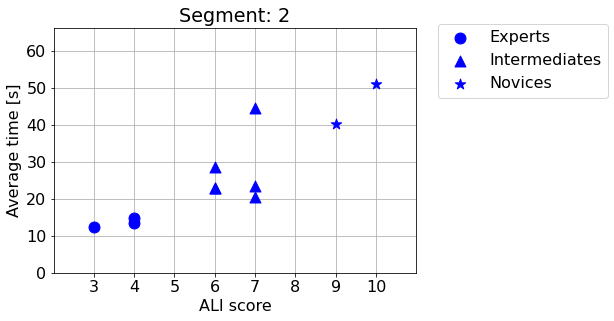

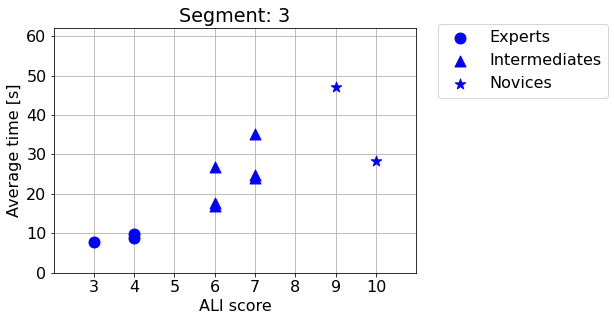

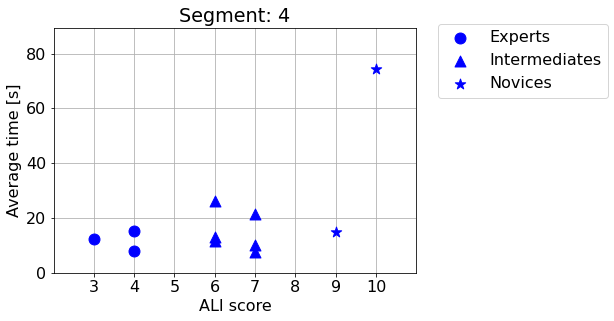

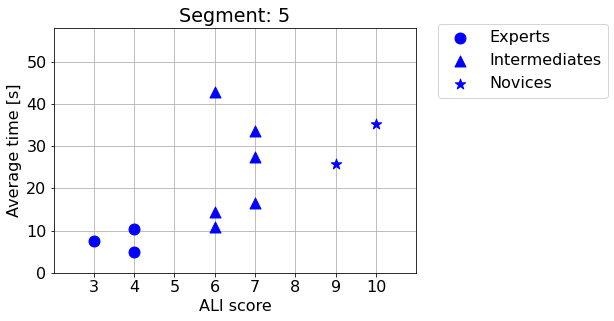

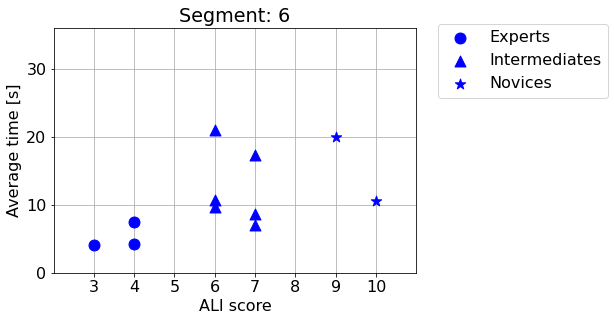

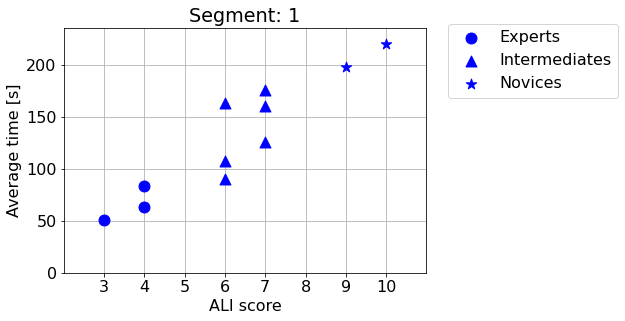

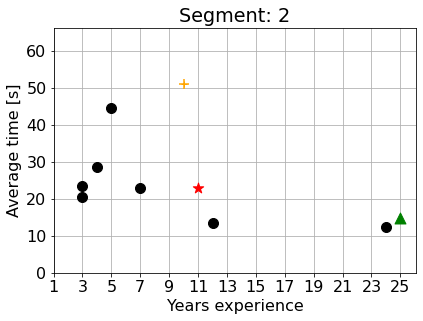

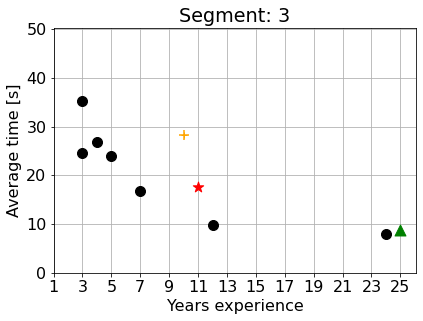

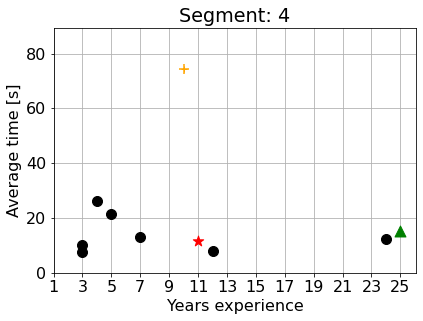

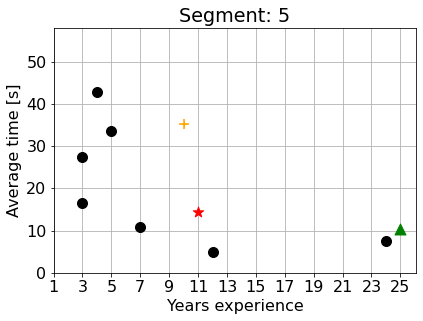

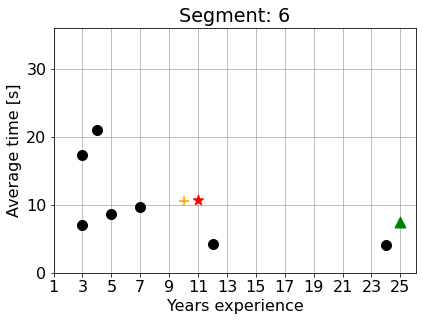

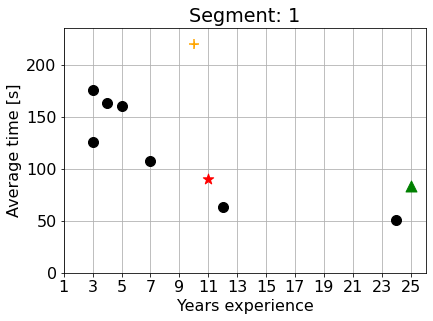

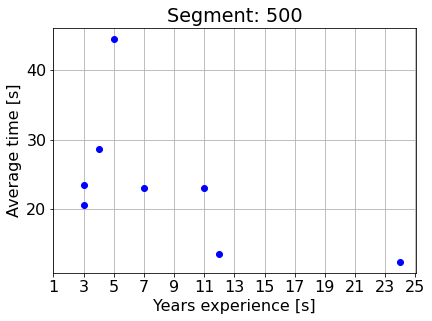

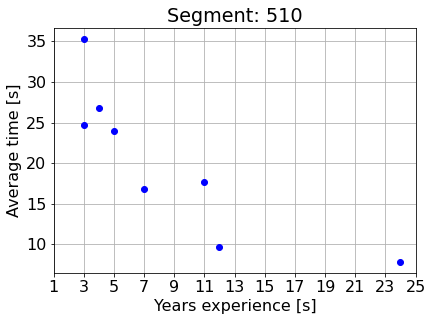

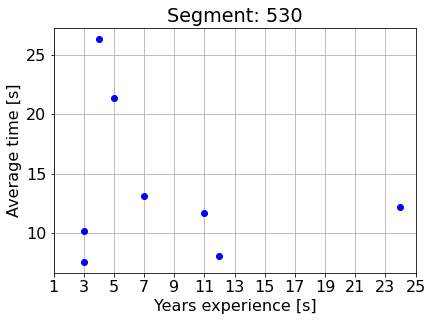

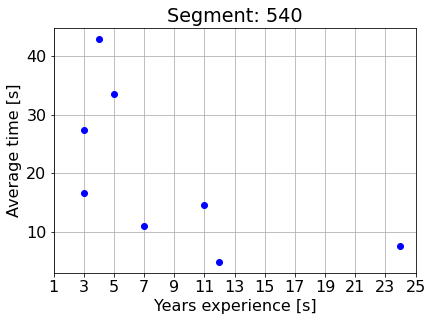

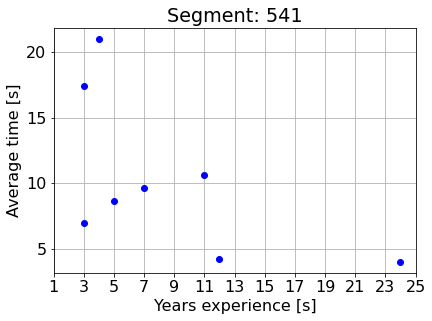

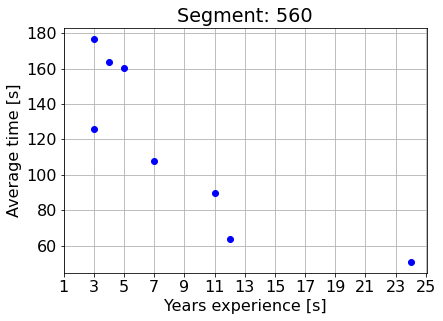

In [300]:

segment_new = ['2','3','4','5','6','1']
import plotly.express as px

duration_run_segments = {}
mean_duration_run_segments ={}
std_duration_run_segments ={}

for subject in subject_list:
    duration_run_segments[subject] = {} 
    mean_duration_run_segments[subject] = {} 
    std_duration_run_segments[subject] = {}  
    for segment in segment_list:
        duration_run_segments[subject][segment] = [] 
        mean_duration_run_segments[subject][segment] = []
        std_duration_run_segments[subject][segment] = []
        
        
for subject in subject_list:
    for segment in segment_list:
        for run in run_list[subject][segment]: 
            duration_run_segments[subject][segment].append(np.array(data_segments[subject][segment][run]['optitrack']['rel_time'])[-1] - np.array(data_segments[subject][segment][run]['optitrack']['rel_time'])[0] )
            #based on optitrack relative time of segment 560 
        
        mean_duration_run_segments[subject][segment] = np.mean(duration_run_segments[subject][segment])
        std_duration_run_segments[subject][segment] = np.std(duration_run_segments[subject][segment])


#subject_order = ['10','3','4','11','8','2','1','5','6','7','12','9']
#ALI_score = ['3','4','4','6','6','6','7','7','7','9','10','9']
subject_order = ['10','3','4','11','8','2','1','5','6','7','12']
ALI_score = ['3','4','4','6','6','6','7','7','7','9','10']
ALI_score= [3,4,4,6,6,6,7,7,7,9,10]


subject_order_novice = ['7','12']
ALI_novice = [9,10]
subject_order_intermediate = ['11','8','2','1','5','6']
ALI_intermediate = [6,6,6,7,7,7]
subject_order_expert = ['10','3','4']
ALI_expert = [3,4,4]

for k, segment in enumerate(segment_list):
    y1 = []
    y2 = []
    y3 = []
    #for subject in subject_order:
        
        #y.append(mean_duration_run_segments[subject][segment])
        
        #e.append(std_duration_run_segments[subject][segment])
    #x1= ALI_score
    
    for subject in subject_order_expert:
        y1.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_intermediate:
        y2.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_novice:
        y3.append(mean_duration_run_segments[subject][segment])     
    
    plt.figure(figsize=(6.5, 4.5))

    #eb1 = plt.errorbar(x, y, e,lw=1,fmt='o',ecolor = 'black',color='blue',elinewidth = 1, capsize=5)
    #eb1 = plt.errorbar(x, y,fmt='o',color='blue')
    plt.scatter(ALI_expert, y1, s = 120 ,color='blue', marker = 'o', label ='Experts')
    plt.scatter(ALI_intermediate, y2, s = 120 ,color='blue', marker = '^', label = 'Intermediates')
    plt.scatter(ALI_novice, y3, s = 120 ,color='blue', marker = '*', label = 'Novices')

    #eb1[-1][0].set_linestyle('--') 
    plt.ylabel('Average time [s]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.55, 1.05))

    # To show the plot
    ticks = [3,4,5,6,7,8,9,10]
    
    plt.xlim([2, 11])
    plt.ylim([0, max(max(y1),max(y2),max(y3))+15])
    #plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xticks(ticks=ticks, labels=ticks)
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'TIME')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'TIME'))

    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME', 'ALI_time_segment_wo_error' + segment  +'.png'), bbox_inches='tight')
    #plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME','no_legend', 'ALI_time_segment_wo_error' + segment  +'.png'), bbox_inches='tight')

    plt.show()

    


    
subject_order_neuro = ['1','2','6','5','8','3','10']
experience_years = ['1','2','1','3','5','6','10','12','24']
experience_years_neuro = [3,4,3,5,7,12,24]

subject_order_plastic = ['11']
experience_years_plastic = [11]

subject_order_maxilo = ['12']
experience_years_maxilo = [10]

subject_order_general = ['4']
experience_years_general = [25]


#subject_order_novice = ['7','9']
#experience_years_novice = [0,0]
"""
fig  = go.Figure()
for segment in segment_list:
    eb1 = []
    eb2 = []
    eb3 = []
    eb4=[]
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    x4 = []
    y4 = []

    for subject in subject_order_neuro:
        y1.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_plastic:
        y2.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_maxilo:
        y3.append(mean_duration_run_segments[subject][segment])     
    for subject in subject_order_general:
        y4.append(mean_duration_run_segments[subject][segment])
        #e.append(std_duration_run_segments[subject][segment])
    x1= experience_years_neuro
    x2= experience_years_plastic
    x3=experience_years_maxilo
    x4=experience_years_general
    fig.add_trace(go.Scatter(y=y1, x=x1, mode='markers', name="Neuro"))
    fig.add_trace(go.Scatter(y=y2, x=x2, mode='markers', name="Plastic"))
    fig.add_trace(go.Scatter(y=y3, x=x3, mode='markers', name="Maxillofacial"))
    fig.add_trace(go.Scatter(y=y4, x=x4, mode='markers', name="General"))

    fig.update_xaxes(title_text="Years experience [s]")
   
    fig.update_yaxes(title_text="Average time [s]")

    
    
    fig.update_layout(title='Segment:' + str(segment) ,
               #xaxis_title='ALI',
               #yaxis_title='Mean range[mm]',
               width=1500,
               height=500,
                         )
    fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color='#2F4F4F'),
        selector=dict(mode='markers+text'))
    

    #fig.update_yaxes(range=[0, 0.5])


    fig.show()
   # if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_hand_travel' )):
    #    os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_hand_travel'))
   # fig.write_image(join('..', 'data_exp',  'PLOTS','optitrack_hand_travel', 'segment' + segment  +'tweezer.png'))
    
""" 
for k, segment in enumerate(segment_list):
    eb1 = []
    eb2 = []
    eb3 = []
    eb4=[]
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    #e = []
    for subject in subject_order_neuro:
        y1.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_plastic:
        y2.append(mean_duration_run_segments[subject][segment])
    for subject in subject_order_maxilo:
        y3.append(mean_duration_run_segments[subject][segment])     
    for subject in subject_order_general:
        y4.append(mean_duration_run_segments[subject][segment])
        #e.append(std_duration_run_segments[subject][segment])
    x1= experience_years_neuro
    x2= experience_years_plastic
    x3=experience_years_maxilo
    x4=experience_years_general
    plt.figure(figsize=(6.5, 4.5))
    plt.grid()

    #eb1 = plt.errorbar( linestyle = 'None', marker='^')
    eb1 = plt.errorbar(x1, y1,lw=1,fmt='o',color='black',label = 'Neuro')
    plt.scatter(x1, y1, s = 100 ,color='black', marker = 'o')
    eb2 = plt.errorbar(x2, y2,lw=1,fmt='*',color='red', label = 'Plastic')
    plt.scatter(x2, y2, s = 120, marker = '*', color='red')
    eb3 = plt.errorbar(x3, y3,lw=1,fmt='+',color='orange', label = 'Maxillofacial')
    plt.scatter(x3, y3, s = 120, marker = '+', color='orange')
    eb4 = plt.errorbar(x4, y4,lw=1,fmt='^',color='green', label = 'General')
    plt.scatter(x4, y4, s = 120, marker = '^', color='green')


    #eb1[-1][0].set_linestyle('--') 
    plt.ylabel('Average time [s]')
    plt.xlabel('Years experience')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.xticks(np.arange(1, 26, 2))
    plt.ylim([0, max(max(y1),max(y2),max(y3),max(y4))+15])
    # To show the plot
    #plt.legend(bbox_to_anchor=(1.5, 1.05))

    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'TIME')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'TIME'))
   
    #lgd = plt.legend( loc='upper center', bbox_to_anchor=(1.3, 1.05))
    #plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME', 'years_time_segment' + segment  +'.png'), bbox_inches='tight')
    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME','no_legend', 'years_time_segment' + segment  +'.png'), bbox_inches='tight')

    plt.show()
    
subject_order = ['1', '2', '6','5','8','11','3','10']
experience_years = ['3','4','3','5','7','11','12','24']
experience_years = [3,4,3,5,7,11,12,24]


for segment in segment_list:
   
    eb1 = []
    x = []
    y = []
    #e = []
    for subject in subject_order:
        
        y.append(mean_duration_run_segments[subject][segment])
        
        #e.append(std_duration_run_segments[subject][segment])
    x= experience_years
    plt.figure(figsize=(6.5, 4.5))

    eb1 = plt.errorbar(x, y,lw=1,fmt='o',color='blue')

    #plt.plot(x, y,'*')
    plt.xticks(np.arange(1, 26, 2))
    
    #eb1[-1][0].set_linestyle('--') 
    plt.ylabel('Average time [s]')
    plt.xlabel('Years experience [s]')
    plt.title('Segment: ' + str(segment), fontdict=None, loc='center', pad=None)
    plt.grid()
    # To show the plot
    
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'TIME')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'TIME'))

    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME', 'years_micro_time_segment' + segment  +'.png'))

    #plt.show()
    
  

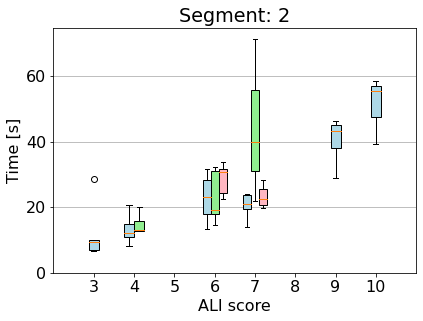

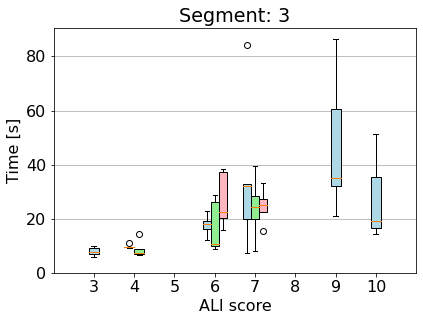

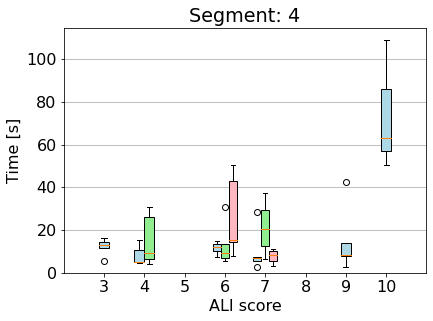

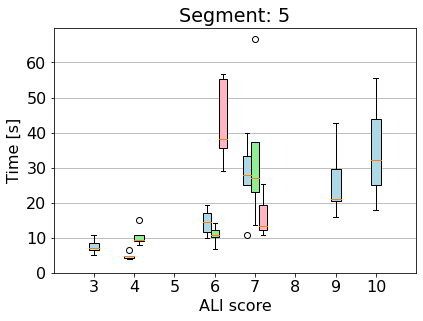

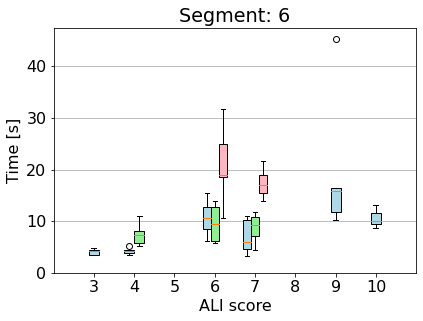

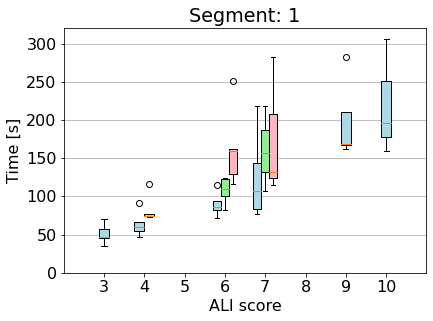

"\n\nfig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))\n\n# rectangular box plot\nbplot1 = ax1.boxplot(all_data,\n                     vert=True,  # vertical box alignment\n                     patch_artist=True,  # fill with color\n                     labels=labels)  # will be used to label x-ticks\nax1.set_title('Rectangular box plot')\n\n\n\n# fill with colors\ncolors = ['pink', 'lightblue', 'lightgreen']\nfor bplot in (bplot1, bplot2):\n    for patch, color in zip(bplot['boxes'], colors):\n        patch.set_facecolor(color)\n\n# adding horizontal grid lines\nfor ax in [ax1, ax2]:\n    ax.yaxis.grid(True)\n    ax.set_xlabel('Three separate samples')\n    ax.set_ylabel('Observed values')\n\nplt.show()"

In [301]:
plt.rcParams.update({'font.size': 16})

subject_order = ['10','3','4','11','8','2','1','5','6','7','12']    
ALI_score= [3,4,4,6,6,6,7,7,7,9,10]
positions = [0,1.75,2.25,5.6,6,6.4,7.6,8,8.4,12,14]

for k, segment in enumerate(segment_list):
    x = []
    y = []
    data = []
    f = plt.figure(figsize=(6.5, 4.5))

    for i, subject in enumerate(subject_order):
        data.append([subject, ALI_score[i], duration_run_segments[subject][segment]])

        y.append(duration_run_segments[subject][segment])
    x= ALI_score
    df = pd.DataFrame(data, columns=['subject', 'ALI', 'values'])

    bplot = plt.boxplot(y,patch_artist=True, positions=positions, widths=(0.5, 0.5, 0.5, 0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.5))
    
    colors = ['lightblue', 'lightblue', 'lightgreen','lightblue','lightgreen','lightpink','lightblue','lightgreen','lightpink','lightblue', 'lightblue']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel('Time [s]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.grid(axis = 'y')
    #bplot.yaxis.grid(True)
    ticks = [3,4,5,6,7,8,9,10]
    
    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.ylim(bottom = 0)
    #plt.figure(figsize=(width, height))
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'TIME')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'TIME'))

    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'TIME', 'ALI_time_segment_boxplot' + segment  +'.png'),bbox_inches='tight')
    
    plt.show()
    
    

"""

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')



# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()"""

## one wy anova time VS categories

In [ ]:
# create the data separating expertise for each channels
channels_data = {}

expert_subjects = ['4','10','3']
intermediate_subjects = ['1','2','5','6','8','11']
novice_subjects = ['7', '12']
category = ['Novice', 'Intermediate', 'Expert']


subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}



time_segment_subject_expertise = {}
for segment in segment_list:
    
    time_segment_subject_expertise[segment] = []

for segment in segment_list: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','time','time_data_SEGMENT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        #open last one
    # create the csv writer
    writer = csv.writer(f)
    header = ['specialty','value']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                time = np.array(data_segments[subject][segment][run]['optitrack']['rel_time'])[-1] - np.array(data_segments[subject][segment][run]['optitrack']['rel_time'])[0]
                row = [cat, time]
                writer.writerow(row)
                time_segment_subject_expertise[segment].append(row)
    f.close() 
                    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

time_expertise_dataframe = {}
for segment, values in time_segment_subject_expertise.items():
    
    time_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value"])
#print( time_expertise_dataframe)
    
time_anova_results = {}
for segment, dataframe in time_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value ~ C(category)', data=dataframe).fit()
    time_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(time_anova_results[segment])
    
    



# TPS processing

In [302]:
sensor = 'TPS_calibrated'

for subject in subject_list:   
        for segment in segment_list:
            for finger in fingers_cal:  
                tps_segment_subject[subject][segment][finger]=[]
                range_raw_tps_subject[subject][segment][finger] = []

                for run in run_list[subject][segment]:
                    abs_diff_tps[subject][segment][run][finger] = []




for subject in subject_list:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            time_current =  np.array(data_segments[subject][segment][run][sensor]['rel_time']/1000) #CONVERSION EN SECONDES
            
            for finger in fingers_cal:  
                
                data_current = np.array(data_segments[subject][segment][run][sensor][finger])
                #Newton diff method
                diff_tps = (data_current[1:-1] - data_current[0:-2])/(time_current[1:-1] - time_current[0:-2])
                #take abs value of derivative to take into account press and releas variations
                abs_diff_tps[subject][segment][run][finger] = abs(diff_tps)
                # compute range value to have measurement of how much force is applied
                range_raw_tps = max(data_current) - min(data_current)
                
                tps_segment_subject[subject][segment][finger].append(abs(diff_tps)) #valeurs abs derivative tps a la suite pour les runs de 1 sujet, 1 finger
                range_raw_tps_subject[subject][segment][finger].append(range_raw_tps) #valeurs des range a la suite pour les runs de 1 sujet pour 1 finger
                

            df = pd.DataFrame({
                fingers_cal[0]: data_segments[subject][segment][run][sensor][fingers_cal[0]][1:-1],
                fingers_cal[1]: data_segments[subject][segment][run][sensor][fingers_cal[1]][1:-1],
                fingers_cal[2]: data_segments[subject][segment][run][sensor][fingers_cal[2]][1:-1],
                fingers_cal[3]: data_segments[subject][segment][run][sensor][fingers_cal[3]][1:-1],
                fingers_cal[4]: data_segments[subject][segment][run][sensor][fingers_cal[4]][1:-1],
                fingers_cal[5]: data_segments[subject][segment][run][sensor][fingers_cal[5]][1:-1],
                'Derivation, abs value, left index':abs_diff_tps[subject][segment][run][fingers_cal[0]],
                'Derivation, abs value, left middle':abs_diff_tps[subject][segment][run][fingers_cal[1]],
                'Derivation, abs value, left thumb':abs_diff_tps[subject][segment][run][fingers_cal[2]],
                'Derivation, abs value, right index':abs_diff_tps[subject][segment][run][fingers_cal[3]],
                'Derivation, abs value, right middle':abs_diff_tps[subject][segment][run][fingers_cal[4]],
                'Derivation, abs value, right thumb':abs_diff_tps[subject][segment][run][fingers_cal[5]]
            })
            
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=df[fingers_cal[0]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[0]))
            fig.add_trace(go.Scatter(y=df[fingers_cal[1]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[1]))
            fig.add_trace(go.Scatter(y=df[fingers_cal[2]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[2]))

            fig.add_trace(go.Scatter(y=df[fingers_cal[3]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[3]))
            fig.add_trace(go.Scatter(y=df[fingers_cal[4]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[4]))
            fig.add_trace(go.Scatter(y=df[fingers_cal[5]], x=time_current-time_current[0],
                    mode='lines', name=fingers_cal[5]))
            #fig.show()
            
    

            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'tps_plots' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'tps_plots'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION','tps_plots', 'segment' + segment  +'_raw_cal.png'))
    
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=df['Derivation, abs value, left index'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, left index'))
            fig.add_trace(go.Scatter(y=df['Derivation, abs value, left middle'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, left middle'))
            fig.add_trace(go.Scatter(y=df['Derivation, abs value, left thumb'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, left thumb'))

            fig.add_trace(go.Scatter(y=df['Derivation, abs value, right index'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, right index'))
            fig.add_trace(go.Scatter(y=df['Derivation, abs value, right middle'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, right middle'))
            fig.add_trace(go.Scatter(y=df['Derivation, abs value, right thumb'], x=time_current-time_current[0],
                    mode='lines', name='Derivation, abs value, right thumb'))
            #fig.show()
            
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION','tps_plots', 'segment' + segment +'_abs_derivative.png'))

            

### plot tps colormap for each run and for every run of 1 subject

In [ ]:
sensor = 'TPS_calibrated'
for subject in subject_list:   
    for segment in segment_list:
        
            fig = go.Figure()
            x_values = []
            y_values_tot = []
            y_min = 0
            y_limit_diff = 5
            y_limit_range =5
            y_max_range = 2
            y_max_diff = 0.5

        
            for i, finger in enumerate(fingers_cal):
                x_values.append(i)
                
                tot_signal = np.concatenate(tps_segment_subject[subject][segment][finger]) #tous les runs pour un subject, valeur abs de la derivee
                y_values_tot.append(np.mean(tot_signal)) #valeur moyenne pour un sujet
            
            y_values_tot = (np.array(y_values_tot) - y_min) / (y_max_diff - y_min)

            fig.add_trace(go.Scatter(
                x=x_values,
                y=y_values_tot,
                marker=dict(
                    size=16,
                    cmax=1,
                    cmin=0,
                    color=y_values_tot,
                    colorbar=dict(
                        title='Colorbar, 1=' + str(y_max_diff) + '[lbs/s]'
                    ),
                    colorscale="rainbow"
                ),
                mode="markers"))
            
            fig.update_layout(title='Mean abs value of derivative, one subject',
                   xaxis_title='left_index,  left_middle,  left_thumb, right_index, right_middle, right_thumb',
                   yaxis_title='TPS data',
                   yaxis_range=[0,y_limit_diff])
            
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS')):
                    os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS'))

            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS', 'TPS_diff_colormap_subject' +subject + '_segment' + segment + '_' +'.png'))
            
          
            fig = go.Figure()
            x_values = []
            y_values_tot = []

            for i, finger in enumerate(fingers_cal):
                x_values.append(i)
                y_values_tot.append(np.mean(range_raw_tps_subject[subject][segment][finger])) #ajoute a y les valeurs moyennes des range des run pour chaque doigt

            y_values_tot = (np.array(y_values_tot) - y_min) / (y_max_range - y_min)

            fig.add_trace(go.Scatter(
                x=x_values,
                y=y_values_tot,
                marker=dict(
                    size=16,
                    cmax=1,
                    cmin=0,
                    color=y_values_tot,
                    colorbar=dict(
                        title='Colorbar, 1=' + str(y_max_range) + '[lbs]'
                    ),
                    colorscale="rainbow"
                ),
                mode="markers"))
            
            fig.update_layout(title='Mean value of ranges, one subject',
                   xaxis_title='left_index,  left_middle,  left_thumb, right_index, right_middle, right_thumb',
                   yaxis_title='TPS data',
                   yaxis_range=[0,y_limit_range])

            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS', 'TPS_range_colormap_subject' +subject + '_segment' + segment + '_' +'.png'))


     

      
                
            #figures for each run separately
            for j, run in enumerate(run_list[subject]):
                fig = go.Figure()
                x_values = []
                y_values = []      
            
                
                for i, finger in enumerate(fingers_cal):
                    x_values.append(i)

                    mean_signal = np.mean(tps_segment_subject[subject][segment][finger][j]) #moyenne pour 1 run pour un subject, valeur abs de la derivee
                    y_values.append(mean_signal)

                y_values = (np.array(y_values) - y_min) / (y_max_diff - y_min)
                
                

                fig.add_trace(go.Scatter(
                    x=x_values,
                    y=y_values,
                    marker=dict(
                        size=16,
                        cmax=1,
                        cmin=0,
                        color=y_values,
                        colorbar=dict(
                            title='Colorbar, 1=' + str(y_max_diff) + '[lbs/s]'
                        ),
                        colorscale="rdylgn_r"
                    ),
                    mode="markers"))
                
                fig.update_layout(title='Mean abs value of derivative, one run',
                   xaxis_title='left_index,  left_middle,  left_thumb, right_index, right_middle, right_thumb',
                   yaxis_title='TPS data',
                   yaxis_range=[0,y_limit_diff])


                if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'PLOTS','TPS_colormap')):
                            os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'PLOTS', 'TPS_colormap'))

                fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'PLOTS', 'TPS_colormap', 'TPS_diff_colormapsubject' +subject + '_segment' + segment + 'run_' + run +'.png'))

                
            for j, run in enumerate(run_list[subject]):
                fig = go.Figure()
                x_values = []
                y_values = []

                for i, finger in enumerate(fingers_cal):
                    x_values.append(i)
                    y_values.append(np.array(range_raw_tps_subject[subject][segment][finger][j]))
                    
                y_values = (np.array(y_values) - y_min) / (y_max_range - y_min)

                fig.add_trace(go.Scatter(
                    x=x_values,
                    y=y_values,
                    marker=dict(
                        size=16,
                        cmax=1,
                        cmin=0,
                        color=y_values,
                        colorbar=dict(
                            title='Colorbar, 1=' + str(y_max_range) + '[lbs]'
                        ),
                        colorscale="rdylgn_r"
                    ),
                    mode="markers"))
                
                fig.update_layout(title='Values of ranges, one run',
                   xaxis_title='left_index,  left_middle,  left_thumb, right_index, right_middle, right_thumb',
                   yaxis_title='TPS data',
                   yaxis_range=[0,y_limit_range])


                fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'PLOTS', 'TPS_colormap', 'TPS_range_colormapsubject' +subject + '_segment' + segment + 'run_' + run +'.png'))


                 

# PLOTS tps activity

In [ ]:
#plot tps activity = sum derivative active fingers

from plotly.subplots import make_subplots
import plotly.graph_objects as go

RH_fingers = {
    '10':[fingers_cal[5],fingers_cal[3] ], #thumb, index
    '9':[fingers_cal[5],fingers_cal[3] ],
    '3':[fingers_cal[5]],
    '4':[fingers_cal[5]],
    '5':[fingers_cal[5]],
    '6':[fingers_cal[5],fingers_cal[3]],
    '7':[fingers_cal[5],fingers_cal[3] ]

    
    }

LH_fingers = {
    '10':[fingers_cal[2],fingers_cal[0],fingers_cal[1] ], #thumb, index, middle
    '9':[fingers_cal[2],fingers_cal[0],fingers_cal[1] ],
    '3':[fingers_cal[2],fingers_cal[0],fingers_cal[1] ],
    '6':[fingers_cal[2],fingers_cal[0],fingers_cal[1] ],
    '5':[fingers_cal[2],fingers_cal[1] ],
    '4':[fingers_cal[2],fingers_cal[0] ],
    '7':[fingers_cal[2],fingers_cal[0],fingers_cal[1] ] 
    }


sensor = 'TPS_calibrated'

subject_list_tps_activity = ['10','9','3','7','6','5','4']
segment_list_tps_activity =['560','540','500','510','541','530']

sum_derivative_RH = {}
sum_derivative_LH = {}

for subject in subject_list_tps_activity:   
    sum_derivative_RH[subject]={}
    sum_derivative_LH[subject]={}
    for segment in segment_list_tps_activity:
        sum_derivative_RH[subject][segment] = {}
        sum_derivative_LH[subject][segment] = {}
        for run in run_list[subject][segment]:
            sum_derivative_RH[subject][segment][run]=[]
            sum_derivative_LH[subject][segment][run]=[]
                


for subject in subject_list_tps_activity:   
    for segment in segment_list_tps_activity:
        for run in run_list[subject][segment]:
            time_current =  np.array(data_segments[subject][segment][run][sensor]['rel_time']/1000) #CONVERSION EN SECONDES
            
            sum_derivative_RH[subject][segment][run] = np.zeros(len(time_current)-2)
            sum_derivative_LH[subject][segment][run] = np.zeros(len(time_current)-2)
            for finger in RH_fingers[subject]:
                sum_derivative_RH[subject][segment][run] = sum_derivative_RH[subject][segment][run] + (abs_diff_tps[subject][segment][run][finger])
                
            for finger in LH_fingers[subject]:
                sum_derivative_LH[subject][segment][run]= sum_derivative_LH[subject][segment][run] + (abs_diff_tps[subject][segment][run][finger])
                
                
                    
                
                

            df = pd.DataFrame({
                'Activity right hand':sum_derivative_RH[subject][segment][run]/max(sum_derivative_RH[subject][segment][run]),
                'Activity left hand':sum_derivative_LH[subject][segment][run]/max(sum_derivative_LH[subject][segment][run]),
                
            })
            


            fig  = go.Figure()
            fig = make_subplots(rows=2, cols=1) 
            
            fig.add_trace(go.Scatter(y=df['Activity right hand'], x=time_current-time_current[0],
                    mode='lines', name='Right hand'),1,1)

            
            fig.add_trace(go.Scatter(y=df['Activity left hand'], x=time_current-time_current[0],
                    mode='lines', name='Left hand'),2,1)
            
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                   xaxis_title='Time',
                   yaxis_title='TPS derivative',
                   width=1025,
                   height=500,
                             )
            
            fig.update_yaxes(range=[0, 0.5])


            #fig.show()
            
    

            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','tps_plots_activity', 'run'+ str(run) + '_segment' + segment  +'.png'))
    
            
            

subject: 10 segment560 mean percentage RH: 11.022705304368262
subject: 10 segment560 mean percentage LH: 8.809308457476464
subject: 10 segment560 mean percentage all: 23.035866316786137
subject: 10 segment500 mean percentage RH: 17.7298084079447
subject: 10 segment500 mean percentage LH: 24.81458173325767
subject: 10 segment500 mean percentage all: 45.05443581004356
subject: 10 segment510 mean percentage RH: 17.58749019559404
subject: 10 segment510 mean percentage LH: 22.416336219276968
subject: 10 segment510 mean percentage all: 46.08986841904861
subject: 10 segment530 mean percentage RH: 22.009123958216367
subject: 10 segment530 mean percentage LH: 12.894908809548658
subject: 10 segment530 mean percentage all: 36.850615474765235
subject: 10 segment540 mean percentage RH: 30.890262873212993
subject: 10 segment540 mean percentage LH: 35.33783098509726
subject: 10 segment540 mean percentage all: 59.5133715842711
subject: 10 segment541 mean percentage RH: 52.7641623043083
subject: 10 seg

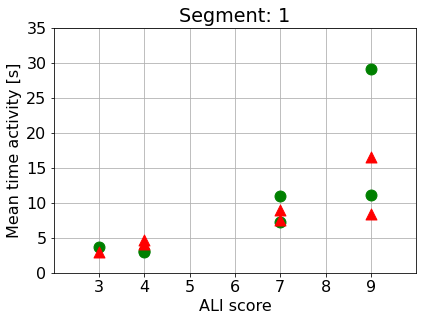

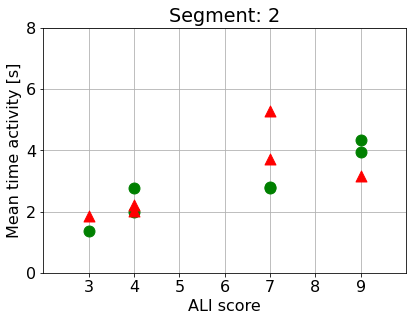

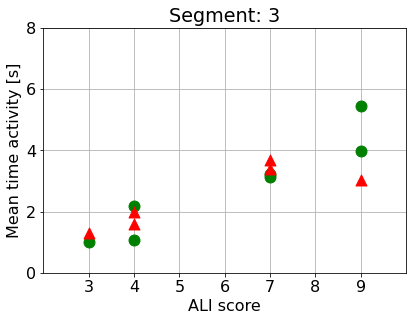

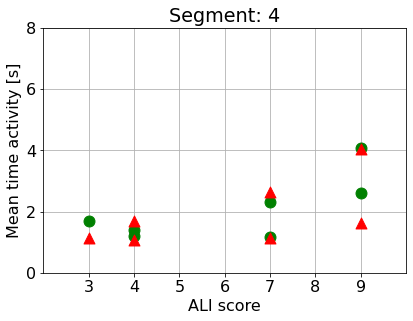

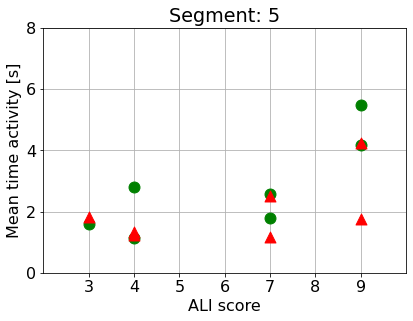

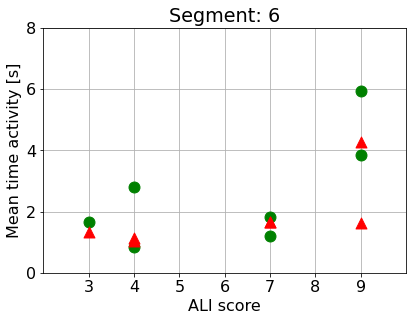

[19.4, 25.8, 14.2, 45.333333333333336, 54.666666666666664, 54.4, 197.75]


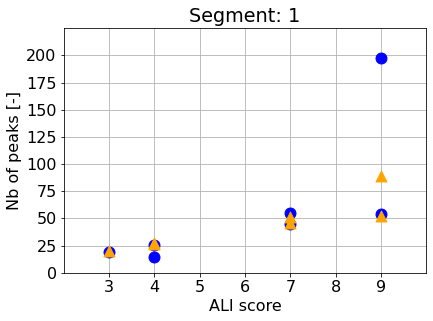

[7.4, 11.6, 7.4, 13.666666666666666, 12.0, 24.6, 26.0]


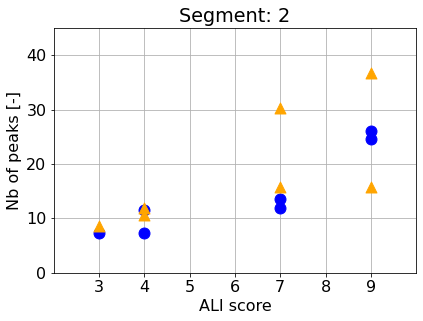

[5.0, 8.2, 3.4, 12.0, 13.5, 20.4, 35.6]


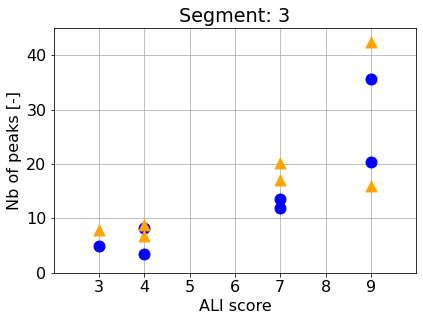

[7.6, 5.4, 6.0, 5.5, 9.0, 10.8, 22.8]


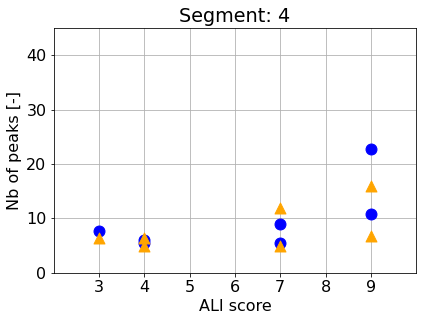

[5.6, 5.0, 13.2, 12.5, 11.0, 17.8, 31.25]


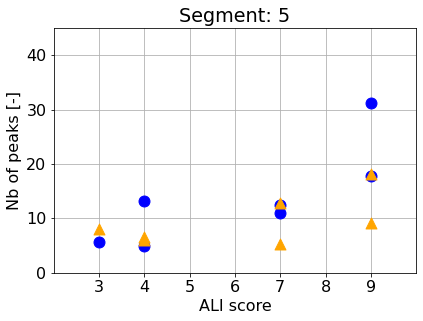

[5.0, 4.8, 10.0, 5.5, 8.0, 15.4, 33.5]


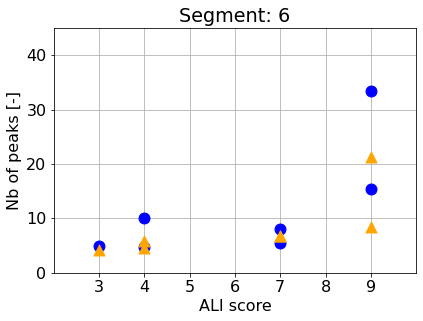

In [303]:
# test metrics for activity measurements
plt.rcParams['axes.axisbelow'] = True

subject_list_tps_activity = ['10','9','3','7','6','5','4']
segment_list_tps_activity =['560','500','510','530','540','541']
segment_new = ['1','2','3','4','5','6']

mean_sum_derivative_LRH_pc={}
sum_derivative_RH_norm={}
sum_derivative_LH_norm={}
time_derivative_RH={}
time_derivative_LH={}
sum_derivative_RH_pc={}
sum_derivative_LH_pc={}
sum_derivative_LRH_pc= {}
mean_sum_derivative_RH_pc={}
mean_sum_derivative_LH_pc={}
mean_sum_derivative_RH_nb_points={}
mean_sum_derivative_LH_nb_points={}
mean_time_derivative_RH={}
mean_time_derivative_LH={}
std_time_derivative_RH={}
std_time_derivative_LH={}
nb_points_derivative_RH={}
nb_points_derivative_LH={}
nb_peaks_derivative_RH={}
nb_peaks_derivative_LH={}
mean_nb_peak_derivative_RH = {}
mean_nb_peak_derivative_LH = {}
for subject in subject_list_tps_activity:   
    sum_derivative_RH_norm[subject]={}
    sum_derivative_LH_norm[subject]={}
    sum_derivative_RH_pc[subject]={}
    sum_derivative_LH_pc[subject]={}
    
    sum_derivative_LRH_pc[subject]={}
    mean_sum_derivative_RH_pc[subject]={}
    mean_sum_derivative_LH_pc[subject]={}
    mean_sum_derivative_LRH_pc[subject]={}
    mean_sum_derivative_RH_nb_points[subject]={}
    mean_sum_derivative_LH_nb_points[subject]={}
    time_derivative_RH[subject]={}
    time_derivative_LH[subject]={}
    nb_points_derivative_RH[subject]={}
    nb_points_derivative_LH[subject]={}
    mean_time_derivative_RH[subject]={}
    mean_time_derivative_LH[subject]={}
    std_time_derivative_RH[subject]={}
    std_time_derivative_LH[subject]={}
    nb_peaks_derivative_RH[subject]={}
    nb_peaks_derivative_LH[subject]={}
    mean_nb_peak_derivative_RH[subject] = {}
    mean_nb_peak_derivative_LH[subject]= {}
    for segment in segment_list_tps_activity:
        sum_derivative_RH_norm[subject][segment] = {}
        sum_derivative_LH_norm[subject][segment] = {}
        sum_derivative_RH_pc[subject][segment] = {}
        sum_derivative_LH_pc[subject][segment] = {}
        sum_derivative_LRH_pc[subject][segment]={}
        mean_sum_derivative_RH_nb_points[subject][segment] = []
        mean_sum_derivative_LH_nb_points[subject][segment] = []
        mean_sum_derivative_RH_pc[subject][segment]=[]
        mean_sum_derivative_LH_pc[subject][segment]=[]
        mean_sum_derivative_LRH_pc[subject][segment] =[]
        time_derivative_RH[subject][segment]={}
        time_derivative_LH[subject][segment]={}
        nb_points_derivative_RH[subject][segment]={}
        nb_points_derivative_LH[subject][segment]={}
        mean_time_derivative_RH[subject][segment]=[]
        mean_time_derivative_LH[subject][segment]=[]
        std_time_derivative_RH[subject][segment]=[]
        std_time_derivative_LH[subject][segment]=[]
        nb_peaks_derivative_RH[subject][segment] = {}
        nb_peaks_derivative_LH[subject][segment] = {}
        mean_nb_peak_derivative_RH[subject][segment] = []
        mean_nb_peak_derivative_LH[subject][segment] =[]
        for run in run_list[subject][segment]:
            sum_derivative_RH_norm[subject][segment][run]=[]
            sum_derivative_LH_norm[subject][segment][run]=[]
            sum_derivative_RH_pc[subject][segment][run]=[]
            sum_derivative_LH_pc[subject][segment][run]=[]
            sum_derivative_LRH_pc[subject][segment][run] = []
            time_derivative_RH[subject][segment][run]=[]
            time_derivative_LH[subject][segment][run]=[]
            nb_points_derivative_RH[subject][segment][run]=[]
            nb_points_derivative_LH[subject][segment][run]=[]
            nb_peaks_derivative_RH[subject][segment][run]=[]
            nb_peaks_derivative_LH[subject][segment][run]=[]


for subject in subject_list_tps_activity:   
    
    for segment in segment_list_tps_activity:
        
        tmp_mean_L = []
        tmp_mean_LR = []
        tmp_mean_R = []
        tmp_mean_R_time=[]
        tmp_mean_L_time=[]
        tmp_mean_R_nb_points=[]
        tmp_mean_L_nb_points=[]
        tmp_mean_nb_peak_R = []
        tmp_mean_nb_peak_L = []
        for run in run_list[subject][segment]:
            
            time_current =  np.array(data_segments[subject][segment][run][sensor]['rel_time']/1000) #CONVERSION EN SECONDES
        
            tmp_R = sum_derivative_RH[subject][segment][run]/max(sum_derivative_RH[subject][segment][run])
            tmp_L = sum_derivative_LH[subject][segment][run]/max(sum_derivative_LH[subject][segment][run])
            sum_derivative_RH_norm[subject][segment][run] = tmp_R
            sum_derivative_LH_norm[subject][segment][run] = tmp_L
            
            sum_derivative_RH_pc[subject][segment][run] = len(tmp_R[tmp_R > 0.1])/len(tmp_R)*100
            sum_derivative_LH_pc[subject][segment][run] = len(tmp_L[tmp_L > 0.1])/len(tmp_L)*100
            
            tmp_LR = tmp_R + tmp_L
            sum_derivative_LRH_pc[subject][segment][run] = len(tmp_LR[tmp_LR > 0.1])/len(tmp_R)*100
            
            time_derivative_RH[subject][segment][run] = len(tmp_R[tmp_R > 0.1])/40
            time_derivative_LH[subject][segment][run] = len(tmp_L[tmp_L > 0.1])/40
            
            nb_points_derivative_RH[subject][segment][run] = len(tmp_R[tmp_R > 0.1])
            nb_points_derivative_LH[subject][segment][run] = len(tmp_L[tmp_L > 0.1])
            
            
            #print("subject: " + subject + " run: " + run + "segment" + str(segment) + "percentage RH: " + str(sum_derivative_RH_pc[subject][run][segment]))
            #print("subject: " + subject + " run: " + run + "segment" + str(segment) + "percentage LH: " + str(sum_derivative_LH_pc[subject][run][segment]))
            
            
            tmp_mean_R.append(sum_derivative_RH_pc[subject][segment][run])           
            tmp_mean_L.append(sum_derivative_LH_pc[subject][segment][run])
            tmp_mean_LR.append(sum_derivative_LRH_pc[subject][segment][run])
            
            tmp_mean_R_time.append(time_derivative_RH[subject][segment][run])
            tmp_mean_L_time.append(time_derivative_LH[subject][segment][run])
            
            tmp_mean_R_nb_points.append(nb_points_derivative_RH[subject][segment][run])
            tmp_mean_L_nb_points.append(nb_points_derivative_LH[subject][segment][run])
            
            nb_peaks_derivative_RH[subject][segment][run] = sp.find_peaks(tmp_R, height=0.12, threshold=0.01, distance=15, prominence=None, width=0, wlen=None, rel_height=1, plateau_size=None)
            nb_peaks_derivative_LH[subject][segment][run] = sp.find_peaks(tmp_L, height=0.15, threshold=0.01, distance=15, prominence=None, width=3, wlen=None, rel_height=3, plateau_size=None)
            #nb_peaks_derivative_RH[subject][segment][run] = sp.find_peaks(tmp_R, height=0.12, threshold=0.01, distance=15, prominence=None, width=0, wlen=None, rel_height=1, plateau_size=None)
            #nb_peaks_derivative_LH[subject][segment][run] = sp.find_peaks(tmp_L, height=0.12, threshold=0.06, distance=8, prominence=None, width=3, wlen=None, rel_height=1, plateau_size=None)
            
            #print("subject: " + subject + " run: " + run + "segment" + str(segment) + "nb peak RH " + str(len(nb_peaks_derivative_RH[subject][run][segment][1]['peak_heights'])))
            #print("subject: " + subject + " run: " + run + "segment" + str(segment) + "nb peak LH: " + str(len(nb_peaks_derivative_LH[subject][run][segment][1]['peak_heights'])))
            tmp_mean_nb_peak_R.append(len(nb_peaks_derivative_RH[subject][segment][run][1]['peak_heights'])) 
            tmp_mean_nb_peak_L.append( len(nb_peaks_derivative_LH[subject][segment][run][1]['peak_heights']))
        
            
             
        mean_nb_peak_derivative_RH[subject][segment]=np.mean(tmp_mean_nb_peak_R)  
        mean_nb_peak_derivative_LH[subject][segment]=np.mean(tmp_mean_nb_peak_L)
        #print("subject: " + subject  + " segment" + str(segment) + " mean peak nb RH: " + str( (mean_nb_peak_derivative_RH[subject][segment])))
        #print("subject: " + subject  + " segment" + str(segment) + " mean peak nb LH: " + str( (mean_nb_peak_derivative_LH[subject][segment])))
            
             
        mean_sum_derivative_RH_pc[subject][segment]=np.mean(tmp_mean_R)  
        mean_sum_derivative_LH_pc[subject][segment]=np.mean(tmp_mean_L)
        mean_sum_derivative_LRH_pc[subject][segment]=np.mean(tmp_mean_LR)
        print("subject: " + subject  + " segment" + str(segment) + " mean percentage RH: " + str( mean_sum_derivative_RH_pc[subject][segment]))
        print("subject: " + subject  + " segment" + str(segment) + " mean percentage LH: " + str(mean_sum_derivative_LH_pc[subject][segment]))
        print("subject: " + subject  + " segment" + str(segment) + " mean percentage all: " + str(mean_sum_derivative_LRH_pc[subject][segment]))

        mean_time_derivative_RH[subject][segment]=np.mean(tmp_mean_R_time)  
        mean_time_derivative_LH[subject][segment]=np.mean(tmp_mean_L_time)
        std_time_derivative_RH[subject][segment]=np.std(tmp_mean_R_time)  
        std_time_derivative_LH[subject][segment]=np.std(tmp_mean_L_time)
        #print("subject: " + subject  + " segment" + str(segment) + " mean time RH: " + str( mean_time_derivative_RH[subject][segment]))
        #print("subject: " + subject  + " segment" + str(segment) + " mean time LH: " + str(mean_time_derivative_LH[subject][segment]))
            
        mean_sum_derivative_RH_nb_points[subject][segment]=np.mean(tmp_mean_R_nb_points)  
        mean_sum_derivative_LH_nb_points[subject][segment]=np.mean(tmp_mean_L_nb_points)
            
        
                
subject_order = ['10','3','4','5','6','7','9']
ALI_score = ['3','4','4','7','7','9','9']
ALI_score = [3,4,4,7,7,9,9]


                    


        
        
for k, segment in enumerate(segment_list_tps_activity):
    eb1 = []
    x = []
    y1 = []
    y2 = []
    e1 = []
    e2 = []
    for subject in subject_order:
        
        y1.append(mean_time_derivative_RH[subject][segment])
        y2.append(mean_time_derivative_LH[subject][segment])
        #e1.append(std_time_derivative_RH[subject][segment])
        #e2.append(std_time_derivative_LH[subject][segment])
    x= ALI_score
    plt.figure(figsize=(6.5, 4.5))

    #eb1 = plt.errorbar(x, y1, e1,lw=1, linestyle = 'None', marker='o')
    #eb1 = plt.errorbar(x, y2, e2,lw=1, linestyle = 'None', marker='^')
    plt.scatter(x, y1, s = 120 ,color='green', marker = 'o', label = 'Right hand')
    plt.scatter(x, y2, s = 120 ,color='red', marker = '^', label = 'Left hand')

    plt.ylabel('Mean time activity [s]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.xticks(np.arange(3, 10, 1))
    plt.xlim([2, 10])

    plt.ylim(bottom = 0)
    if segment == '560':
        #plt.yticks(np.arange(0, max([max(y1), max(y2)])+10, 25))
        plt.ylim([0, 35])
    else:
        plt.ylim([0, 8])
    #plt.ylim([0, max(max(y1),max(y2))+10/100*max(max(y1),max(y2))])

    #plt.legend(bbox_to_anchor=(1.5, 1.05))
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'tps_activity')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'tps_activity'))

    #plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity', 'tps_activity_time_segment' + segment  +'.png'),bbox_inches='tight')
    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity', 'no_legend', 'tps_activity_time_segment' + segment  +'.png'),bbox_inches='tight')

    plt.show()
                    
                




for k, segment in enumerate(segment_list_tps_activity):
    eb1 = []
    y1 = []
    y2 = []

    for subject in subject_order:
        
        y1.append(mean_nb_peak_derivative_RH[subject][segment])
        y2.append(mean_nb_peak_derivative_LH[subject][segment])
        
    x= ALI_score
    plt.figure(figsize=(6.5, 4.5))

    print(y1)
    #eb1 = plt.errorbar(x, y1,lw=1, linestyle = 'None', marker='o')
    plt.scatter(x, y1, s = 120 ,color='blue', marker = 'o', label = 'Right hand')
    #eb1 = plt.errorbar(x, y2,lw=1, linestyle = 'None', marker='^')
    plt.scatter(x, y2, s = 120 ,color='orange', marker = '^', label = 'Left hand')
    #eb1[-1][0].set_linestyle('--') 
    #plt.title(str(segment), fontdict=None, loc='center', pad=None)
    # To show the plot
    plt.ylabel('Nb of peaks [-]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.xticks(np.arange(3, 10, 1))
    plt.ylim(bottom = 0)
    plt.xlim([2, 10])
    #plt.ylim([0, max(max(y1),max(y2))+10/100*max(max(y1),max(y2))])


    if segment == '560':
        plt.yticks(np.arange(0, max([max(y1), max(y2)])+10, 25))
        plt.ylim([0, 225])
    else:
        plt.ylim([0, 45])
    #plt.legend(bbox_to_anchor=(1.5, 1.05))
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'tps_activity')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'tps_activity'))

    #plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity', 'tps_activity_nb_peak' + segment  +'.png'), bbox_inches='tight')
    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity','no_legend', 'tps_activity_nb_peak' + segment  +'.png'), bbox_inches='tight')

    plt.show()
    
    
for subject in subject_list_tps_activity:   
    for run in run_list[subject][segment]:
        for segment in ['560']:    
            time_current =  np.array(data_segments[subject][segment][run][sensor]['rel_time']/1000) #CONVERSION EN SECONDES


            df = pd.DataFrame({
                    'Activity right hand':sum_derivative_RH[subject][segment][run]/max(sum_derivative_RH[subject][segment][run]),
                    'Activity left hand':sum_derivative_LH[subject][segment][run]/max(sum_derivative_LH[subject][segment][run]),
                    #'peaks RH':nb_peaks_derivative_RH[subject][run][segment][1]['peak_heights'],
                    #'peaks LH':nb_peaks_derivative_LH[subject][run][segment][1]['peak_heights']


            })



            fig  = go.Figure()
            fig = make_subplots(rows=2, cols=1) 

            fig.add_trace(go.Scatter(y=df['Activity right hand'], x=time_current-time_current[0],
                    mode='lines', name='Right hand'),1,1)
            fig.add_trace(go.Scatter(y=nb_peaks_derivative_RH[subject][segment][run][1]['peak_heights'], x=time_current[nb_peaks_derivative_RH[subject][segment][run][0]]-time_current[0],
                     mode = 'markers', name='Right hand peaks, nb: ' + str(len(nb_peaks_derivative_RH[subject][segment][run][1]['peak_heights']))),1,1)



            fig.add_trace(go.Scatter(y=df['Activity left hand'], x=time_current-time_current[0],
                    mode='lines', name='Left hand'),2,1)
            fig.add_trace(go.Scatter(y=nb_peaks_derivative_LH[subject][segment][run][1]['peak_heights'], x=time_current[nb_peaks_derivative_LH[subject][segment][run][0]]-time_current[0],
                    mode='markers', name='Left hand peaks, nb: ' + str(len(nb_peaks_derivative_LH[subject][segment][run][1]['peak_heights']))),2,1)

            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                   xaxis_title='Time',
                   yaxis_title='TPS derivative',
                   width=1025,
                   height=500,
                             )

            fig.update_yaxes(range=[0, 1])


            #fig.show()



            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_peaks' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_peaks'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','tps_plots_activity_peaks', 'run'+ str(run) + '_segment' + segment  +'.png'))
            
  

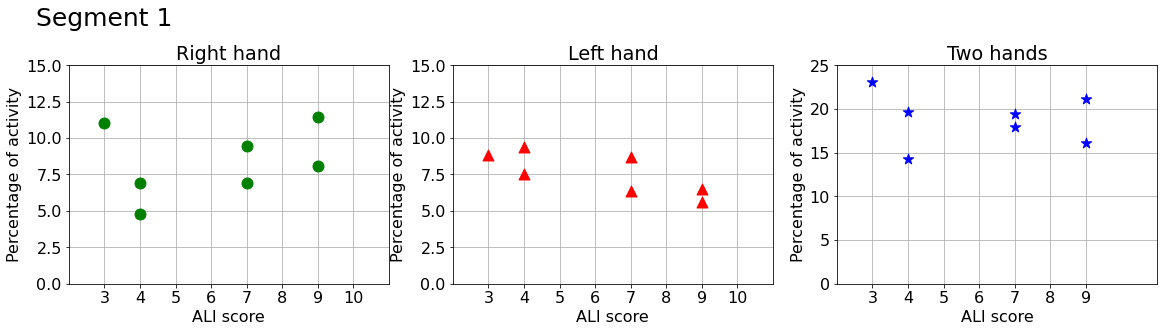

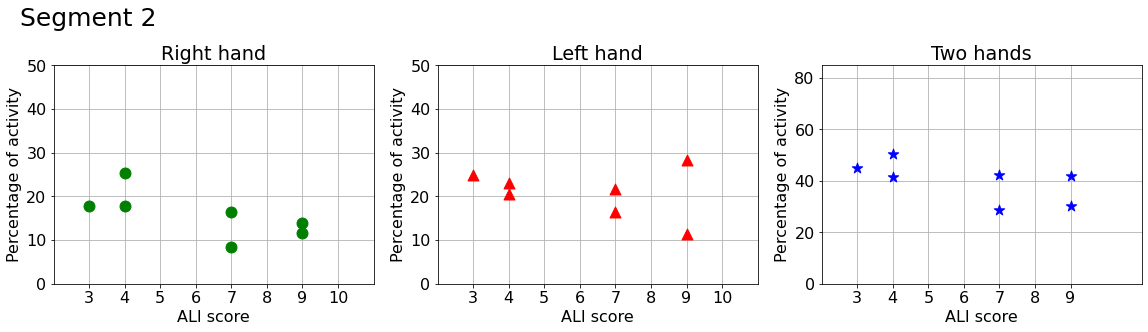

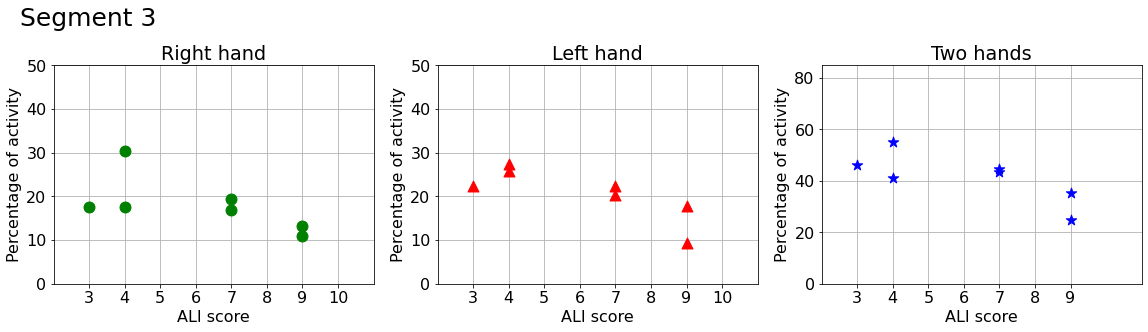

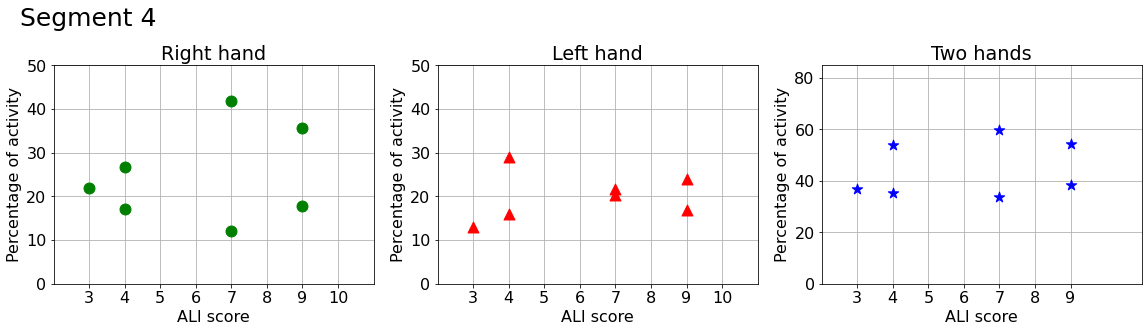

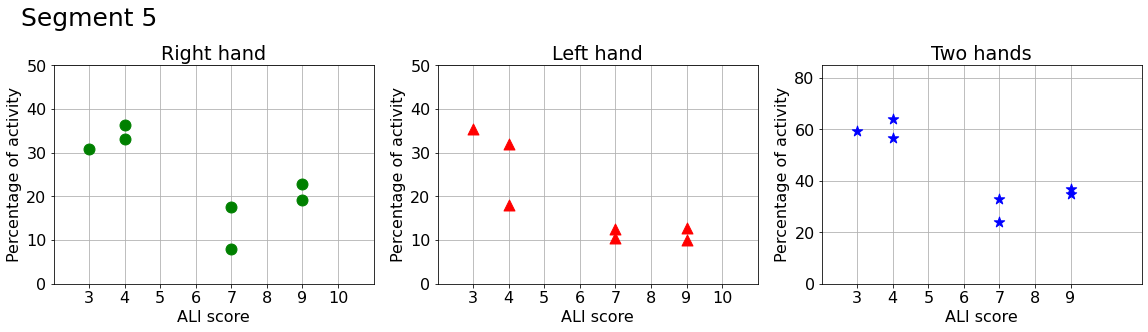

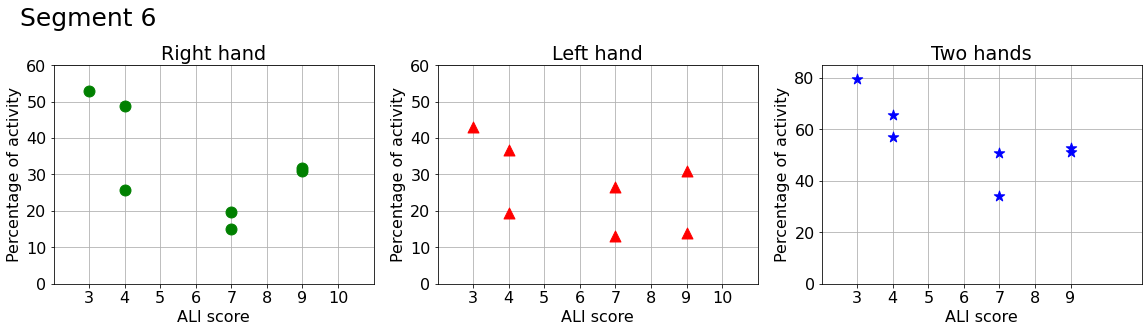

In [310]:
          
for k, segment in enumerate(segment_list_tps_activity):
    x = []
    y1 = []
    y2 = []
    y3 = []

    for subject in subject_order:
        
        y1.append(mean_sum_derivative_RH_pc[subject][segment])
        y2.append(mean_sum_derivative_LH_pc[subject][segment])
        y3.append(mean_sum_derivative_LRH_pc[subject][segment])

    x= ALI_score
    fig, axs = plt.subplots(1,3,figsize=(19.5, 4.5))
        
    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.scatter(x, y1, s = 120 ,color='green', marker = 'o', label = 'Right hand')
    #ax1.scatter(x, y2, s = 120 ,color='red', marker = '^', label = 'Right hand')
    #ax1.scatter(x, y3, s = 120 ,color='blue', marker = '^', label = 'Right hand')
    ax2.scatter(x, y2, s = 120 ,color='red', marker = '^', label = 'Left hand')
    ax3.scatter(x, y3, s = 120 ,color='blue', marker = '*', label = 'Both hand')
    
    legend_elements = [Line2D([0], [0],  marker='o', color='w', label='Right hand', markerfacecolor='green',  markeredgecolor = 'green',markersize=12),
                      Line2D([0], [0], marker='^', color='w', label='Left hand', markerfacecolor='red', markeredgecolor = 'red', markersize=12),
                      Line2D([0], [0], marker='*', color='w', label='Both hand', markerfacecolor='blue',  markeredgecolor = 'blue',markersize=12)]


    #ax3.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.6, 1.03))
    
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    for ax in axs.flat:
        ax.set(xlabel='ALI score', ylabel='Percentage of activity')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #for ax in axs.flat:
       # ax.label_outer()
    #plt.legend(bbox_to_anchor=(1.65, 1.05))

    ticks = [3,4,5,6,7,8,9,10]
    
    ax1.set_xlim([2, 11])
    ax2.set_xlim([2, 11])
    ax1.set_xticks(ticks=ticks, labels=ticks)
    ax1.set_title("Right hand")
    
    ax2.set_xticks(ticks=ticks, labels=ticks)
    ax2.set_title("Left hand")

    ax3.set_xlim([2, 11])

    ax3.set_xticks(ticks=ticks, labels=ticks)    
    ax3.set_title("Two hands")
    
    fig.suptitle("Segment " + segment_new[k], x = 0.15, fontsize=25)    
    fig.subplots_adjust(hspace=0.8, top=0.8)

    #plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.xticks(np.arange(3, 10, 1))

    if segment == '560':
        ax1.set_ylim([0, 15])    
        ax2.set_ylim([0, 15])
        ax3.set_ylim([0, 25])
    else:
        if segment == '541':
            ax1.set_ylim([0, 60])    
            ax2.set_ylim([0, 60])
            ax3.set_ylim([0, 85])
        
        else:
            ax1.set_ylim([0, 50])    
            ax2.set_ylim([0, 50])
            ax3.set_ylim([0, 85])
     #   plt.ylim([0, 8])
    #plt.ylim([0, max(max(y1),max(y2))+10/100*max(max(y1),max(y2))])

    #plt.legend(bbox_to_anchor=(1.5, 1.05))
    
    if not os.path.exists(join(path_to_data_folder , 'PLOTS', 'tps_activity')):
             os.makedirs(join(path_to_data_folder , 'PLOTS', 'tps_activity'))

    #plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity', 'tps_activity_time_segment' + segment  +'.png'),bbox_inches='tight')
    plt.savefig(join('..', 'data_exp' , 'PLOTS', 'tps_activity', 'no_legend', 'tps_activity_time_PC_segment' + segment  +'.png'),bbox_inches='tight')

    plt.show()

In [ ]:
# test metrics for activity measurements
# MEME CHOSE QUE AU DESSUS MAIS SANS TUNAGE DES VALEURS POUR PEAK, PEUT ETRE UTILISER SI ON VEUT PRENDRE LES STATS SANS LES GRAPHES
""" 
subject_list_tps_activity = ['10','9','3','7','6','5','4']
segment_list_tps_activity =['560','540','500']


nb_peaks_derivative_RH={}
nb_peaks_derivative_LH={}
mean_nb_peak_derivative_RH = {}
mean_nb_peak_derivative_LH = {}
for subject in subject_list_tps_activity:   
    nb_peaks_derivative_RH[subject]={}
    nb_peaks_derivative_LH[subject]={}
    mean_nb_peak_derivative_RH[subject] = {}
    mean_nb_peak_derivative_LH[subject]= {}
    for run in run_list[subject]:
        nb_peaks_derivative_RH[subject][run]={}
        nb_peaks_derivative_LH[subject][run]={}

        for segment in segment_list_tps_activity:
            nb_peaks_derivative_RH[subject][run][segment] = []
            nb_peaks_derivative_LH[subject][run][segment] = []
            mean_nb_peak_derivative_RH[subject][segment] = []
            mean_nb_peak_derivative_LH[subject][segment] =[]
                


for subject in subject_list_tps_activity:   
    
    for segment in segment_list_tps_activity:
        tmp_mean_nb_peak_R = []
        tmp_mean_nb_peak_L = []
 
        for run in run_list[subject]:
            
            time_current =  np.array(data_segments[subject][run][sensor][segment]['rel_time']/1000) #CONVERSION EN SECONDES
        
            tmp_R = sum_derivative_RH[subject][run][segment]/max(sum_derivative_RH[subject][run][segment])
            tmp_L = sum_derivative_LH[subject][run][segment]/max(sum_derivative_LH[subject][run][segment])
            
            nb_peaks_derivative_RH[subject][run][segment] = sp.find_peaks(tmp_R, height=0.1, threshold=0.08, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
            nb_peaks_derivative_LH[subject][run][segment] = sp.find_peaks(tmp_L, height=0.1, threshold=0.08, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
            
            print("subject: " + subject + " run: " + run + "segment" + str(segment) + "nb peak RH " + str(len(nb_peaks_derivative_RH[subject][run][segment][1]['peak_heights'])))
            print("subject: " + subject + " run: " + run + "segment" + str(segment) + "nb peak LH: " + str(len(nb_peaks_derivative_LH[subject][run][segment][1]['peak_heights'])))
            tmp_mean_nb_peak_R.append(len(nb_peaks_derivative_RH[subject][run][segment][1]['peak_heights'])) 
            tmp_mean_nb_peak_L.append( len(nb_peaks_derivative_LH[subject][run][segment][1]['peak_heights']))
        
            
            #scipy.signal.find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
             
        mean_nb_peak_derivative_RH[subject][segment]=np.mean(tmp_mean_nb_peak_R)  
        mean_nb_peak_derivative_LH[subject][segment]=np.mean(tmp_mean_nb_peak_L)
        print("subject: " + subject  + " segment" + str(segment) + " mean peak nb RH: " + str( (mean_nb_peak_derivative_RH[subject][segment])))
        print("subject: " + subject  + " segment" + str(segment) + " mean peak nb LH: " + str( (mean_nb_peak_derivative_LH[subject][segment])))
    
       """     



### Activity separate fingers

In [ ]:
#activity separate fingers

subject_list_tps_activity = ['10','3','9']
segment_list_tps_activity = ['560']
for subject in subject_list_tps_activity:
    for segment in segment_list_tps_activity:
        for run in run_list[subject][segment]:
            time_current =  np.array(data_segments[subject][segment][run][sensor]['rel_time']/1000) #CONVERSION EN SECONDES
            #for finger in RH_fingers[subject]:
                #abs_diff_tps[subject][run][segment][finger]
            fig  = go.Figure()
            fig = make_subplots(rows=len(LH_fingers[subject]), cols=1)
            for i, finger in enumerate(LH_fingers[subject]):
                
                fig.add_trace(go.Scatter(y=abs_diff_tps[subject][segment][run][finger], x=time_current-time_current[0],
                    mode='lines', name=finger),i+1,1)
                
            fig.update_xaxes(title_text="Time [s]", row=1, col=1)
            fig.update_xaxes(title_text="Time [s] ", row=2, col=1)
            fig.update_xaxes(title_text="Time [s]", row=3, col=1)
            fig.update_yaxes(title_text="[lbs/s]", row=1, col=1)
            fig.update_yaxes(title_text="[lbs/s]", row=2, col=1)
            fig.update_yaxes(title_text="[lbs/s]", row=3, col=1)
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                   #xaxis_title='Time',
                   #yaxis_title='TPS derivative [lbs/s]',
                   width=1025,
                   height=500,
                             )
            #fig.show()
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_LH' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_LH'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','tps_plots_activity_LH', 'separate_fingers_act_run'+ str(run) + '_segment' + segment  +'.png'))

            
            
            fig  = go.Figure()
            fig = make_subplots(rows=len(LH_fingers[subject]), cols=1)
            for i, finger in enumerate(LH_fingers[subject]):
                fig.add_trace(go.Scatter(y=np.array(data_segments[subject][segment][run][sensor][finger]), x=time_current-time_current[0],
                    mode='lines', name=finger),i+1,1)
                
            fig.update_xaxes(title_text="Time [s]", row=1, col=1)
            fig.update_xaxes(title_text="Time [s] ", row=2, col=1)
            fig.update_xaxes(title_text="Time [s]", row=3, col=1)
            fig.update_yaxes(title_text="TPS force [lbs]", row=1, col=1)
            fig.update_yaxes(title_text="TPS force [lbs]", row=2, col=1)
            fig.update_yaxes(title_text="TPS force [lbs]", row=3, col=1)
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                   #xaxis_title='Time',
                   #yaxis_title='TPS force [lbs]',
                   width=1025,
                   height=500,
                             )
            #fig.show()
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_LH' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'tps_plots_activity_LH'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','tps_plots_activity_LH', 'separate_fingers_force_run'+ str(run) + '_segment' + segment  +'.png'))
            
            
    for i, finger in enumerate(LH_fingers[subject]):        
        print('Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment) + ' Finger' + finger + ' Mean range:   ' + str(np.mean(range_raw_tps_subject[subject][segment][finger])))


## one way anova nb of movements

In [ ]:
# create the data separating expertise for each channels
subject_list_tps_activity = ['10','9','3','7','6','5','4']

expert_subjects = ['4','10','3']
intermediate_subjects = ['5','6']
novice_subjects = ['7', '9']
category = ['Novice', 'Intermediate', 'Expert']


subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}



nb_peaks_act_segment_subject_expertise = {}
#nb_peaks_act_LH_segment_subject_expertise = {}

for segment in segment_list:
    
    nb_peaks_act_segment_subject_expertise[segment] = []
    #nb_peaks_act_LH_segment_subject_expertise[segment] = []

for segment in segment_list: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','TPS','nb_activity_peak_SEGMENT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        #open last one
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','value_nb_peaks_RH', 'value_nb_peaks_LH']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                nb_peak_RH = (len(nb_peaks_derivative_RH[subject][segment][run][1]['peak_heights']))
                nb_peak_LH = (len(nb_peaks_derivative_LH[subject][segment][run][1]['peak_heights']))
                
                row = [cat, nb_peak_RH, nb_peak_LH]
                writer.writerow(row)
                nb_peaks_act_segment_subject_expertise[segment].append(row)
    f.close() 
                    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

nb_peaks_act_expertise_dataframe = {}
for segment, values in nb_peaks_act_segment_subject_expertise.items():
    
    nb_peaks_act_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_nb_peaks_RH", "value_nb_peaks_LH"])
#print( time_expertise_dataframe)
    
nb_peaks_act_anova_results = {}
for segment, dataframe in nb_peaks_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_peaks_RH ~ C(category)', data=dataframe).fit()
    nb_peaks_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(nb_peaks_act_anova_results[segment])
print("-----------")
for segment, dataframe in nb_peaks_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_peaks_LH ~ C(category)', data=dataframe).fit()
    nb_peaks_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(nb_peaks_act_anova_results[segment])
   

## one way anova time above trheshold



In [ ]:
 # create the data separating expertise for each channels
subject_list_tps_activity = ['10','9','3','7','6','5','4']

expert_subjects = ['4','10','3']
intermediate_subjects = ['5','6']
novice_subjects = ['7', '9']
category = ['Novice', 'Intermediate', 'Expert']


subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}



time_act_segment_subject_expertise = {}

for segment in segment_list:
    
    time_act_segment_subject_expertise[segment] = []

for segment in segment_list: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','TPS','time_activity_SEGMENT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        #open last one
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','value_time_RH', 'value_time_LH']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                time_act_RH = time_derivative_RH[subject][segment][run]
                time_act_LH = time_derivative_LH[subject][segment][run]
                
                row = [cat, time_act_RH, time_act_LH]
                writer.writerow(row)
                time_act_segment_subject_expertise[segment].append(row)
    f.close() 
                    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

time_act_expertise_dataframe = {}
for segment, values in time_act_segment_subject_expertise.items():
    
    time_act_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_time_RH", "value_time_LH"])
#print( time_expertise_dataframe)
    
time_act_anova_results = {}
for segment, dataframe in time_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_time_RH ~ C(category)', data=dataframe).fit()
    time_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(time_act_anova_results[segment])
print("-----------")
for segment, dataframe in time_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_time_LH ~ C(category)', data=dataframe).fit()
    time_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(time_act_anova_results[segment])
    
 

## one way anova percentage activity

In [292]:
 # create the data separating expertise for each channels
subject_list_tps_activity = ['10','9','3','7','6','5','4']

expert_subjects = ['4','10','3']
intermediate_subjects = ['5','6']
novice_subjects = ['7', '9']
category = ['Novice', 'Intermediate', 'Expert']


subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}



pc_act_segment_subject_expertise = {}

for segment in segment_list:
    
    pc_act_segment_subject_expertise[segment] = []

for segment in segment_list: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','TPS','time_activity_PC_SEGMENT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        #open last one
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','value_PC_RH', 'value_PC_LH', 'value_PC_LRH']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                pc_act_RH = sum_derivative_RH_pc[subject][segment][run]
                pc_act_LH = sum_derivative_LH_pc[subject][segment][run]
                pc_act_LRH = sum_derivative_LRH_pc[subject][segment][run]
                
                row = [cat, pc_act_RH, pc_act_LH,pc_act_LRH]
                writer.writerow(row)
                pc_act_segment_subject_expertise[segment].append(row)
    f.close() 
                    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

pc_act_expertise_dataframe = {}
for segment, values in pc_act_segment_subject_expertise.items():
    
    pc_act_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_PC_RH", "value_PC_LH","value_PC_LRH"])
#print( time_expertise_dataframe)
    
pc_act_anova_results = {}
for segment, dataframe in pc_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_PC_RH ~ C(category)', data=dataframe).fit()
    pc_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(pc_act_anova_results[segment])
print("-----------")

for segment, dataframe in pc_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_PC_LH ~ C(category)', data=dataframe).fit()
    pc_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(pc_act_anova_results[segment])
print("-----------")

for segment, dataframe in pc_act_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_PC_LRH ~ C(category)', data=dataframe).fit()
    pc_act_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print(segment)
    print(pc_act_anova_results[segment])
 

500
                  sum_sq    df         F    PR(>F)
C(category)   443.302138   2.0  2.788779  0.078029
Residual     2304.908659  29.0       NaN       NaN
510
                  sum_sq    df         F    PR(>F)
C(category)   573.314943   2.0  2.419783  0.106103
Residual     3553.923018  30.0       NaN       NaN
530
                   sum_sq    df         F    PR(>F)
C(category)    196.098188   2.0  0.289825  0.750466
Residual     10149.138373  30.0       NaN       NaN
540
                  sum_sq    df        F    PR(>F)
C(category)  2374.695228   2.0  5.46106  0.009942
Residual     6087.780086  28.0      NaN       NaN
541
                  sum_sq    df         F    PR(>F)
C(category)  3319.369864   2.0  7.333863  0.002645
Residual     6562.825356  29.0       NaN       NaN
560
                 sum_sq    df         F    PR(>F)
C(category)   22.462233   2.0  0.600249  0.555833
Residual     505.190796  27.0       NaN       NaN
-----------
500
                  sum_sq    df         F    P

# optitrack data

## data review optitrack

In [ ]:
#subject_list_optitrack = ['3','4','5','6','7','8','9','10','11','12']
subject_list_optitrack = ['2','3','4','5','6','7','8','9','10','11','12']


segment_list_optitrack = ['500','510','530','540','541']
segment_new_optitrack = ['2','3','4','5','6']


tools_position = ['tweezer_x', 'tweezer_y', 'tweezer_z', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z']
tools_quaternions = [ 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw']

tools = ['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw']

#subject_list_optitrack = ['1']
#tools = ['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder_x', 'needle_holder_y', 'needle_holder_z', 'needle_holder_qx', 'needle_holder_qy', 'needle_holder_qz', 'needle_holder_qw']

sensor = 'optitrack'
optitrack_segment_subject = {}
optitrack_non_zero= {}
optitrack_non_zero_time = {}
for subject in subject_list_optitrack:   
    optitrack_segment_subject[subject] = {}
    optitrack_non_zero[subject]= {}
    optitrack_non_zero_time[subject] = {}
    for segment in segment_list:
        optitrack_segment_subject[subject][segment] = {}
        optitrack_non_zero[subject][segment]= {}
        optitrack_non_zero_time[subject][segment] = {}
        for run in run_list[subject][segment]:
            optitrack_segment_subject[subject][segment][run] = {}
            optitrack_non_zero[subject][segment][run]= {}
            optitrack_non_zero_time[subject][segment][run] = {}
            for tool in tools:  
                optitrack_segment_subject[subject][segment][run][tool]=[]
                optitrack_non_zero[subject][segment][run][tool] = []
                optitrack_non_zero_time[subject][segment][run] [tool] = []



#remove 0 values from loss of tracking FOR computations BUT should use vectors with the zeroes to keep correspondance of time with data
for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            for tool in tools:
                time_current = data_segments[subject][segment][run][sensor]['rel_time']        
                data_current = data_segments[subject][segment][run][sensor][tool]
                
                optitrack_segment_subject[subject][segment][run][tool] = data_current
                optitrack_non_zero[subject][segment][run][tool] = data_current[data_current != 0]
                optitrack_non_zero_time[subject][segment][run][tool] = time_current[data_current != 0]

for tool in ['tweezer_x', 'needle_holder2_x']:
    for subject in subject_list_optitrack:   
        for segment in ['560']:
            for run in run_list[subject][segment]:             
             
                #print("subject: " + subject + " segment: " + segment + " run; " + run + " tool: " + tool + str(len(optitrack_non_zero[subject][segment][run][tool])/len(optitrack_segment_subject[subject][segment][run][tool] )*100))
                
            print("--------")

In [ ]:
# plots signaux total
for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            time_current =  optitrack_non_zero_time[subject][segment][run][tool]
            fig = go.Figure()
            for tool in tools_position:  
                
                data_current = np.array(optitrack_non_zero[subject][segment][run][tool])
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='markers', name=tool))
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Optitrack data [m]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_position_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))

            

### find ranges (max hand travel distance)

In [ ]:
from tabulate import tabulate

range_travel = {}
mean_run_range_travel = {}
for subject in subject_list_optitrack:   
    range_travel[subject] = {}
    mean_run_range_travel[subject] = {}
    for segment in segment_list_optitrack:
        range_travel[subject][segment] = {}
        mean_run_range_travel[subject][segment] = {}
        for run in run_list[subject][segment]:
        
            range_travel[subject][segment][run] = {}
            
            for tool in tools_position:
                range_travel[subject][segment][run][tool] = []
                
                mean_run_range_travel[subject][segment][tool] = []
                
                
data = []
col_names = ['Subject', 'Segment', tools_position[0], tools_position[1], tools_position[2],  tools_position[3],  tools_position[4],  tools_position[5]]
for subject in subject_list_optitrack: 
    for segment in segment_list_optitrack:
        for tool in tools_position:
            for run in run_list[subject][segment]:
            
                range_travel[subject][segment][run][tool] = max(optitrack_non_zero[subject][segment][run][tool]) - min(optitrack_non_zero[subject][segment][run][tool])
                mean_run_range_travel[subject][segment][tool].append(range_travel[subject][segment][run][tool])
                
            mean_run_range_travel[subject][segment][tool] = np.mean( mean_run_range_travel[subject][segment][tool])  
        
        data.append([subject, segment, mean_run_range_travel[subject][segment][tools_position[0]]*1000,
                     mean_run_range_travel[subject][segment][tools_position[1]]*1000, 
                     mean_run_range_travel[subject][segment][tools_position[2]]*1000,
                    mean_run_range_travel[subject][segment][tools_position[3]]*1000,
                    mean_run_range_travel[subject][segment][tools_position[4]]*1000,
                    mean_run_range_travel[subject][segment][tools_position[5]]*1000]
                   )
                 

In [ ]:
#PLOTS      
#print(tabulate(data, headers=col_names, tablefmt="grid"))

subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','6','7','7','9','9','10']
#subject_list_optitrack = ['2','3','4','5','6','7','8','9','10','11','12']


for segment in segment_list_optitrack:
    y1 = {}
    for i,tool in enumerate(tools_position):
        y1[i] = []

        for subject in subject_order:
            y1[i].append(mean_run_range_travel[subject][segment][tools_position[i]]*1000)
          
        x= ALI_score


    fig  = go.Figure()
    fig = make_subplots(rows=1, cols=3) 

    fig.add_trace(go.Scatter(y=y1[0], x=x, 
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[0]),1,1)
    fig.add_trace(go.Scatter(y=y1[1], x=x,
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[1]),1,2)
    fig.add_trace(go.Scatter(y=y1[2], x=x,
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[2]),1,3)

    fig.update_xaxes(title_text="ALI score", row=1, col=1)
    fig.update_xaxes(title_text="ALI score", row=1, col=2)
    fig.update_xaxes(title_text="ALI score", row=1, col=3)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=1)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=2)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=3)
    
    
    fig.update_layout(title='Segment:' + str(segment) ,
               #xaxis_title='ALI',
               #yaxis_title='Mean range[mm]',
               width=1500,
               height=500,
                         )
    fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color='#2F4F4F'),
        selector=dict(mode='markers+text'))
    

    #fig.update_yaxes(range=[0, 0.5])


    fig.show()
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_hand_travel' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_hand_travel'))
    fig.write_image(join('..', 'data_exp',  'PLOTS','optitrack_hand_travel', 'segment' + segment  +'tweezer.png'))
    
    
    fig  = go.Figure()
    fig = make_subplots(rows=1, cols=3) 

    fig.add_trace(go.Scatter(y=y1[3], x=x, text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[3]),1,1)
    fig.add_trace(go.Scatter(y=y1[4], x=x, text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[4]),1,2)
    fig.add_trace(go.Scatter(y=y1[5], x=x,text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name=tools_position[5]),1,3)
    fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color='#2F4F4F'),
        selector=dict(mode='markers+text'))
    
    fig.update_xaxes(title_text="ALI score", row=1, col=1)
    fig.update_xaxes(title_text="ALI score", row=1, col=2)
    fig.update_xaxes(title_text="ALI score", row=1, col=3)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=1)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=2)
    fig.update_yaxes(title_text="Mean range[mm]", row=1, col=3)


    fig.update_layout(title=' Segment:' + str(segment) ,
               #xaxis_title='ALI',
               #yaxis_title='Mean range[mm]',
               width=1500,
               height=500,
                         )
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_hand_travel' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_hand_travel'))
    fig.write_image(join('..', 'data_exp',  'PLOTS','optitrack_hand_travel', 'segment' + segment  +'holder.png'))
    fig.show()


In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

tool_plot = ['Tweezers', 'Needle Holder']

subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','6','7','7','9','9','10']

subject_order_novice = ['7','9','12']
ALI_novice = [9,9,10]
subject_order_intermediate = ['11','8','2','5','6']
ALI_intermediate = [6,6,6,7,7]
subject_order_expert = ['10','3','4']
ALI_expert = [3,4,4]

for k, segment in enumerate(segment_list_optitrack):
    y1 = {}
    y2 = {}
    y3 = {}
    for i,tool in enumerate(tools_position):
        y1[i] = [] #dd
        y2[i] = []
        y3[i] = []
        x1 = ALI_expert
        x2 = ALI_intermediate
        x3 = ALI_novice
        for subject in subject_order_expert:
            y1[i].append(mean_run_range_travel[subject][segment][tools_position[i]]*1000)
        for subject in subject_order_intermediate:
            y2[i].append(mean_run_range_travel[subject][segment][tools_position[i]]*1000)
        for subject in subject_order_novice:
            y3[i].append(mean_run_range_travel[subject][segment][tools_position[i]]*1000)    
        #for subject in subject_order:
         #   y1[i].append(mean_run_range_travel[subject][segment][tools_position[i]]*1000)
          
        x= ALI_score


    
    fig, axs = plt.subplots(1,3,figsize=(19.5, 4.5))
    
    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    
    for ax in axs.flat:
        ax.set(xlabel='ALI score', ylabel='Mean range[mm]')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    ax1.scatter(x1, y1[1], s = 120 ,color='c', marker = 'o', edgecolor = 'black', label ='Experts')
    ax1.scatter(x2, y2[1], s = 120 ,color='c', marker = '^', edgecolor = 'black',label = 'Intermediates')
    ax1.scatter(x3, y3[1], s = 120 ,color='c', marker = '*',edgecolor = 'black',label = 'Novices')
    
    ax2.scatter(x1, y1[2], s = 120 ,color='c', marker = 'o',edgecolor = 'black', label ='Experts')
    ax2.scatter(x2, y2[2], s = 120 ,color='c', marker = '^', edgecolor = 'black',label = 'Intermediates')
    ax2.scatter(x3, y3[2], s = 120 ,color='c', marker = '*', edgecolor = 'black',label = 'Novices')
    
    ax3.scatter(x1, y1[3], s = 120 ,color='c', marker = 'o', edgecolor = 'black',label ='Experts')
    ax3.scatter(x2, y2[3], s = 120 ,color='c', marker = '^',edgecolor = 'black', label = 'Intermediates')
    ax3.scatter(x3, y3[3], s = 120 ,color='c', marker = '*', edgecolor = 'black', label = 'Novices')
    
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ticks = [3,4,5,6,7,8,9,10]

        
    ax1.set_xlim([2, 11])
    ax1.set_ylim([0, 100])
    ax1.set_xticks(ticks=ticks, labels=ticks)
    ax1.set_title("x direction")
    ax2.set_xlim([2, 11])
    ax2.set_ylim([0, 100])
    ax2.set_xticks(ticks=ticks, labels=ticks)
    ax2.set_title("z direction")
    ax3.set_xlim([2, 11])
    ax3.set_ylim([0, 100])
    ax3.set_xticks(ticks=ticks, labels=ticks)    
    ax3.set_title("y direction")
    
    legend_elements = [Line2D([0], [0],  marker='o', color='w', label='Experts', markerfacecolor='w', markeredgecolor = 'black', markersize=12),
                      Line2D([0], [0], marker='^', color='w', label='Intermediates', markerfacecolor='w',  markeredgecolor = 'black',markersize=12),
                      Line2D([0], [0], marker='*', color='w', label='Novices', markerfacecolor='w',  markeredgecolor = 'black', markersize=12)]
                    #Patch(facecolor='aqua', edgecolor='w', label=tools_position[0]),
                    #Patch(facecolor='red', edgecolor='w', label=tools_position[1]),
                    #Patch(facecolor='darkslategrey', edgecolor='w', label=tools_position[2])]
    
    ax3.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.6, 1.03))
    
    fig.suptitle("Segment " + segment_new_optitrack[k]+ ", " + tool_plot[0], x = 0.17, fontsize=25)    
    fig.subplots_adjust(hspace=0.6, top=0.8)
    
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_hand_travel' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_hand_travel'))
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_hand_travel', 'V2segment' + segment  +'tweezer.png'), bbox_inches='tight')



    
    fig, axs = plt.subplots(1,3,figsize=(19.5, 4.5))
    
    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    
    ax1.scatter(x1, y1[3], s = 120 ,color='limegreen', marker = 'o', edgecolor = 'black', label ='Experts')
    ax1.scatter(x2, y2[3], s = 120 ,color='limegreen', marker = '^', edgecolor = 'black', label = 'Intermediates')
    ax1.scatter(x3, y3[3], s = 120 ,color='limegreen', marker = '*', edgecolor = 'black', label = 'Novices')
    
    ax2.scatter(x1, y1[5], s = 120 ,color='limegreen', marker = 'o', edgecolor = 'black', label ='Experts')
    ax2.scatter(x2, y2[5], s = 120 ,color='limegreen', marker = '^', edgecolor = 'black', label = 'Intermediates')
    ax2.scatter(x3, y3[5], s = 120 ,color='limegreen', marker = '*', edgecolor = 'black', label = 'Novices')
    
    ax3.scatter(x1, y1[4], s = 120 ,color='limegreen', marker = 'o' ,edgecolor = 'black')
    ax3.scatter(x2, y2[4], s = 120 ,color='limegreen', marker = '^',edgecolor = 'black')
    ax3.scatter(x3, y3[4], s = 120 ,color='limegreen', marker = '*',edgecolor = 'black')
    
    legend_elements = [Line2D([0], [0],  marker='o', color='w', label='Experts', markerfacecolor='w',  markeredgecolor = 'black',markersize=12),
                      Line2D([0], [0], marker='^', color='w', label='Intermediates', markerfacecolor='w', markeredgecolor = 'black', markersize=12),
                      Line2D([0], [0], marker='*', color='w', label='Novices', markerfacecolor='w',  markeredgecolor = 'black',markersize=12)]
                    #Patch(facecolor='violet', edgecolor='w', label=tools_position[3]),
                   # Patch(facecolor='green', edgecolor='w', label=tools_position[5]),
                   # Patch(facecolor='orange', edgecolor='w', label=tools_position[4])]
    
    
    
    ax3.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.6, 1.03))
    
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    for ax in axs.flat:
        ax.set(xlabel='ALI score', ylabel='Mean range[mm]')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    #plt.legend(bbox_to_anchor=(1.65, 1.05))

    ticks = [3,4,5,6,7,8,9,10]
    
    ax1.set_xlim([2, 11])
    ax1.set_ylim([0, 100])
    ax1.set_xticks(ticks=ticks, labels=ticks)
    ax1.set_title("x direction")
    ax2.set_xlim([2, 11])
    ax2.set_ylim([0, 100])
    ax2.set_xticks(ticks=ticks, labels=ticks)
    ax2.set_title("z direction")

    ax3.set_xlim([2, 11])
    ax3.set_ylim([0, 100])
    ax3.set_xticks(ticks=ticks, labels=ticks)    
    ax3.set_title("y direction")
    
    fig.suptitle("Segment " + segment_new_optitrack[k]+", " + tool_plot[1], x = 0.192, fontsize=25)    
    fig.subplots_adjust(hspace=0.6, top=0.8)
   # plt.title('Segment: ' + segment, fontdict=None, loc='center', pad=None)

    #plt.show()

    
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_hand_travel' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_hand_travel'))
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_hand_travel', 'V2segment' + segment  +'holder.png'), bbox_inches='tight')





## one way anova hand travel distance

In [ ]:
# create the data separating expertise for each channels


subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','6','7','7','9','9','10']

subject_order_novice = ['7','9','12']
subject_order_intermediate = ['11','8','2','5','6']
subject_order_expert = ['10','3','4']

category = ['Novice', 'Intermediate', 'Expert']


subject_expertise = {
    'Expert': subject_order_expert,
    'Novice': subject_order_novice,
    'Intermediate': subject_order_intermediate
}



hand_travel_segment_subject_expertise = {}
for segment in segment_list_optitrack:
    hand_travel_segment_subject_expertise[segment] = []

for segment in segment_list_optitrack: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','hand_travel_dist' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','value_hand_travel_tweezers_x', 'value_hand_travel_tweezers_y','value_hand_travel_tweezers_z','value_hand_travel_nh_x', 'value_hand_travel_nh_y', 'value_hand_travel_nh_z',]
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                tweezer_x = range_travel[subject][segment][run][tools_position[0]] 
                tweezer_y = range_travel[subject][segment][run][tools_position[1]] 
                tweezer_z = range_travel[subject][segment][run][tools_position[2]] 
                nh_x = range_travel[subject][segment][run][tools_position[3]] 
                nh_y = range_travel[subject][segment][run][tools_position[4]] 
                nh_z = range_travel[subject][segment][run][tools_position[5]] 
                
                row = [cat, tweezer_x, tweezer_y, tweezer_z, nh_x, nh_y, nh_z]
                writer.writerow(row)
                hand_travel_segment_subject_expertise[segment].append(row)
    f.close() 
                    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

hand_travel_expertise_dataframe = {}
for segment, values in hand_travel_segment_subject_expertise.items():
    
    hand_travel_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_hand_travel_tweezers_x", "value_hand_travel_tweezers_y","value_hand_travel_tweezers_z","value_hand_travel_nh_x", "value_hand_travel_nh_y", "value_hand_travel_nh_z"])
#print( time_expertise_dataframe)
    
hand_travel_anova_results = {}
for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_tweezers_x ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: tweezer x " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_tweezers_y ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: tweezer y " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_tweezers_z ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: tweezer z " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_nh_x ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: needle holder x " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_nh_y ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: needle holder y " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

for segment, dataframe in hand_travel_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_hand_travel_nh_z ~ C(category)', data=dataframe).fit()
    hand_travel_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " tool: needle holder z " )
    print(hand_travel_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

In [ ]:
print(subject_expertise[cat])

## compute speed and jerk

In [ ]:


diff_optitrack = {}
diff_optitrack_time= {}
acc_optitrack = {}
acc_optitrack_time= {}
butt_signal_speed_optitrack={}
butt_signal_acc_optitrack={}
acc_optitrack_filtered_speed={}
jerk_optitrack_filtered_speed={}
jerk_optitrack_filtered_speed_time={}
for subject in subject_list_optitrack:   
    diff_optitrack[subject]={}
    diff_optitrack_time[subject] ={}
    acc_optitrack[subject] ={}
    acc_optitrack_time[subject]= {}
    butt_signal_speed_optitrack[subject]={}
    butt_signal_acc_optitrack[subject]={}
    acc_optitrack_filtered_speed[subject]={}
    jerk_optitrack_filtered_speed[subject]={}
    jerk_optitrack_filtered_speed_time[subject]={}
    for segment in segment_list:
        diff_optitrack[subject][segment] = {}
        diff_optitrack_time[subject][segment]={}
        acc_optitrack[subject][segment]={}
        acc_optitrack_time[subject][segment]= {}
        butt_signal_speed_optitrack[subject][segment]={}
        butt_signal_acc_optitrack[subject][segment]={}
        acc_optitrack_filtered_speed[subject][segment]={}
        jerk_optitrack_filtered_speed[subject][segment]={}
        jerk_optitrack_filtered_speed_time[subject][segment]={}
        for run in run_list[subject][segment]:
            diff_optitrack[subject][segment][run]={}
            diff_optitrack_time[subject][segment][run]={}
            acc_optitrack[subject][segment][run]= {}
            acc_optitrack_time[subject][segment][run]={}
            butt_signal_speed_optitrack[subject][segment][run]={}
            butt_signal_acc_optitrack[subject][segment][run]={}
            acc_optitrack_filtered_speed[subject][segment][run]={}
            jerk_optitrack_filtered_speed[subject][segment][run]={}
            jerk_optitrack_filtered_speed_time[subject][segment][run]={}
            for tool in tools:
                diff_optitrack[subject][segment][run][tool] = []
                diff_optitrack_time[subject][segment][run][tool] = []
                acc_optitrack[subject][segment][run][tool] = []
                acc_optitrack_time[subject][segment][run][tool] = []
                butt_signal_speed_optitrack[subject][segment][run][tool] = []
                butt_signal_acc_optitrack[subject][segment][run][tool] =[]
                acc_optitrack_filtered_speed[subject][segment][run][tool] = []
                jerk_optitrack_filtered_speed[subject][segment][run][tool] =[]
                jerk_optitrack_filtered_speed_time[subject][segment][run][tool] = []


for subject in subject_list_optitrack:   
    for segment in segment_list:
         for run in run_list[subject][segment]:
            for tool in tools_position:
                data_current = np.array(optitrack_non_zero[subject][segment][run][tool] )
                time_current = np.array(optitrack_non_zero_time[subject][segment][run][tool] )
                #Newton diff method
                diff_optitrack[subject][segment][run][tool] = (data_current[1:] - data_current[0:-1])/(time_current[1:] - time_current[0:-1])
                #diff_optitrack[subject][segment][run][tool] = np.diff(data_current)/np.diff(time_current)
                diff_optitrack_time[subject][segment][run][tool] = ((time_current[1:]) + (time_current[0:-1]))/2
                
                
                acc_optitrack[subject][segment][run][tool] = np.diff(diff_optitrack[subject][segment][run][tool])/np.diff(diff_optitrack_time[subject][segment][run][tool])
                

                #acc_optitrack[subject][segment][run][tool] = (data_current[1:] - data_current[0:-1])/(time_current[1:] - time_current[0:-1])
                acc_optitrack_time[subject][segment][run][tool] = ( np.array(diff_optitrack_time[subject][segment][run][tool][1:]) +  np.array(diff_optitrack_time[subject][segment][run][tool][0:-1]))/2
                
                fs = 120
                fco_s = 5
                fco_a = 10
                fny = fs/2
                N = 4
                [b, a] = sp.butter(N, 1.16*fco_s/fny,  btype='low')
                #rec_signal = abs(data_current)
                butt_signal_speed_optitrack[subject][segment][run][tool] = sp.filtfilt(b, a, diff_optitrack[subject][segment][run][tool])
                [b, a] = sp.butter(N, 1.16*fco_a/fny,  btype='low')
                butt_signal_acc_optitrack[subject][segment][run][tool] = sp.filtfilt(b, a, acc_optitrack[subject][segment][run][tool])

                #sp.signal.butter(order, Wn, btype='low', analog=False, output='ba', fs=None)
                                                                     
                acc_optitrack_filtered_speed[subject][segment][run][tool] = np.diff(butt_signal_speed_optitrack[subject][segment][run][tool])/np.diff(diff_optitrack_time[subject][segment][run][tool])
                    
                jerk_optitrack_filtered_speed[subject][segment][run][tool] = np.diff(acc_optitrack_filtered_speed[subject][segment][run][tool])/np.diff(acc_optitrack_time[subject][segment][run][tool])
                jerk_optitrack_filtered_speed_time[subject][segment][run][tool] =  (np.array(acc_optitrack_time[subject][segment][run][tool][1:]) +  np.array(acc_optitrack_time[subject][segment][run][tool][0:-1]))/2
                    
for subject in subject_list_optitrack: 
    for segment in segment_list:
        for run in run_list[subject][segment]:
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current =  diff_optitrack_time[subject][segment][run][tool]
                data_current = diff_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  diff_optitrack_time[subject][segment][run][tool]
                data_current = diff_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Speed [m/s]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_speed_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))


for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current = acc_optitrack_time[subject][segment][run][tool]
                data_current = acc_optitrack[subject][segment][run][tool] 
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  acc_optitrack_time[subject][segment][run][tool]
                data_current = acc_optitrack[subject][segment][run][tool] 
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Acceleration [m/s2]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_acc_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))

for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current = diff_optitrack_time[subject][segment][run][tool]
                data_current = butt_signal_speed_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  diff_optitrack_time[subject][segment][run][tool]
                data_current = butt_signal_speed_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Speed [m/s]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_speed_filter_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))
            
            
for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current = acc_optitrack_time[subject][segment][run][tool]
                data_current = butt_signal_acc_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  acc_optitrack_time[subject][segment][run][tool]
                data_current = butt_signal_acc_optitrack[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Speed [m/s]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_acc_filter_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))            
            
             
for subject in subject_list_optitrack:
    for segment in segment_list:
        for run in run_list[subject][segment]:
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current = acc_optitrack_time[subject][segment][run][tool]
                data_current = acc_optitrack_filtered_speed[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  acc_optitrack_time[subject][segment][run][tool]
                data_current = acc_optitrack_filtered_speed[subject][segment][run][tool]
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Acceleration [m/s2]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_acc_filtered_speed_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))            
                       
for subject in subject_list_optitrack:
    for segment in segment_list:
         for run in run_list[subject][segment]:
            
            fig = go.Figure()
            fig = make_subplots(rows=1, cols=2) 
            for tool in tools_position[0:3]:  
                time_current = jerk_optitrack_filtered_speed_time[subject][segment][run][tool] 
                data_current = jerk_optitrack_filtered_speed[subject][segment][run][tool] 
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,1)
                
            for tool in tools_position[3:]:  
                time_current =  jerk_optitrack_filtered_speed_time[subject][segment][run][tool] 
                data_current = jerk_optitrack_filtered_speed[subject][segment][run][tool] 
                
                fig.add_trace(go.Scatter(y=data_current, x=time_current-data_segments[subject][segment][run][sensor]['rel_time'][0],
                    mode='lines', name=tool),1,2)
                
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Jerk [m/s3]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_jerk_filtered_speed_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))            
                     

## jerk analysis

In [ ]:
peaks_optitrack= {}
nb_peaks_jerk={}
mean_nb_peaks_jerk={}
mean_duration_run={}
for subject in subject_list_optitrack: 
    peaks_optitrack[subject]= {}
    nb_peaks_jerk[subject]={}
    mean_nb_peaks_jerk[subject]={}
    mean_duration_run[subject]={}
    for segment in segment_list:
        peaks_optitrack[subject][segment]={}
        nb_peaks_jerk[subject][segment] ={}
        mean_nb_peaks_jerk[subject][segment] ={}
        mean_duration_run[subject][segment] = {}
        
        for run in run_list[subject][segment]:
            peaks_optitrack[subject][segment][run] = {}
            nb_peaks_jerk[subject][segment][run]=[]

            
            for tool in tools_position:
                peaks_optitrack[subject][segment][run][tool]=[]




for subject in subject_list_optitrack:   
    for segment in segment_list:
        list_sum_peaks_subject_segment = []
        list_duration_runs =[]
        for run in run_list[subject][segment]:
            nb_peaks_optitrack = []
            
            for tool in tools_position:
                time_current = jerk_optitrack_filtered_speed_time[subject][segment][run][tool] 
                data = jerk_optitrack_filtered_speed[subject][segment][run][tool]
                
                peaks_optitrack[subject][segment][run][tool] = sp.find_peaks(data, height=10, threshold=None, distance=5, prominence=None, width=0, wlen=None, rel_height=1, plateau_size=None)
                nb_peaks_optitrack.append(len(peaks_optitrack[subject][segment][run][tool][1]['peak_heights']))
                
                
            nb_peaks_jerk[subject][segment][run] = sum(nb_peaks_optitrack) #somme des pic de jerk pour un sujet, un run , un segment
            list_sum_peaks_subject_segment.append(sum(nb_peaks_optitrack)) #liste des sommes de pics pour un sujet, un segment, les runs
            list_duration_runs.append(time_current[-1] - time_current[0])
        mean_nb_peaks_jerk[subject][segment] = np.mean(list_sum_peaks_subject_segment)#moyenne du nb de pic pour un eujt un segment sur les runs
        mean_duration_run[subject][segment] = np.mean(list_duration_runs)
            
            
            
for subject in subject_list_optitrack:   
    for segment in segment_list: 
        for run in run_list[subject][segment]:
           
            fig  = go.Figure()
            fig = make_subplots(rows=2, cols=1) 
            for tool in tools_position[0:3]:
                time_current = jerk_optitrack_filtered_speed_time[subject][segment][run][tool] 
                data = jerk_optitrack_filtered_speed[subject][segment][run][tool]

                fig.add_trace(go.Scatter(y=data, x=time_current-time_current[0],
                        mode='lines', name=tool),1,1)
                fig.add_trace(go.Scatter(y=peaks_optitrack[subject][segment][run][tool][1]['peak_heights'], x=time_current[peaks_optitrack[subject][segment][run][tool][0]]-time_current[0],
                         mode = 'markers', name=tool + ' peaks, nb: ' + str(len(peaks_optitrack[subject][segment][run][tool][1]['peak_heights']))),1,1)

            for tool in tools_position[3:]:
                time_current = jerk_optitrack_filtered_speed_time[subject][segment][run][tool] 
                data = jerk_optitrack_filtered_speed[subject][segment][run][tool]
                fig.add_trace(go.Scatter(y=data, x=time_current-time_current[0],
                        mode='lines', name=tool),2,1)
                fig.add_trace(go.Scatter(y=peaks_optitrack[subject][segment][run][tool][1]['peak_heights'], x=time_current[peaks_optitrack[subject][segment][run][tool][0]]-time_current[0],
                        mode='markers', name=tool + ' peaks, nb: ' + str(len(peaks_optitrack[subject][segment][run][tool][1]['peak_heights']))),2,1)

            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                   xaxis_title='Time',
                   yaxis_title='Jerk',
                   width=800,
                   height=500,
                             )

            #fig.update_yaxes(range=[0, 1])


            #fig.show()



            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'jerk_peaks' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, 'PLOTS', 'jerk_peaks'))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, 'PLOTS','jerk_peaks', 'run'+ str(run) + '_segment' + segment  +'.png'))

In [ ]:
#print(jerk_optitrack_filtered_speed_time[subject][segment])
print(run)

### plots jerk VS ALI

In [ ]:
# un point somme jerk pour les 2 tools dans toutes les directions

#subject_order = ['10','3','4','8','11','5','6','7','9','12']
#ALI_score = ['3','4','4','6','6','7','7','9','9','10']


subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','6','7','7','9','9','10']



for segment in segment_list_optitrack:
    y1 = []
    y2 = []
    for subject in subject_order:
        y1.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        y2.append(mean_nb_peaks_jerk[subject][segment])
          
        x= ALI_score


    fig  = go.Figure()
    fig = make_subplots(rows=1, cols=2) 

    fig.add_trace(go.Scatter(y=y1, x=x, 
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name = "ff"),1,1)
    fig.add_trace(go.Scatter(y=y2, x=x, 
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name = None),1,2)
    
    fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color='#2F4F4F'),
        selector=dict(mode='markers+text'))
    
    # Update xaxis properties
    fig.update_xaxes(title_text="ALI score", row=1, col=1)
    fig.update_xaxes(title_text="ALI score", row=1, col=2)
    fig.update_yaxes(title_text="Sum nb of jerk motions / sum run time [s-1]", row=1, col=1)
    fig.update_yaxes(title_text="Mean nb of jerk motions [-]", row=1, col=2)

    fig.update_layout(title='Segment:' + str(segment) ,
               #xaxis_title='ALI score',
               #yaxis_title='Mean nb of jerk motions [-]',
               showlegend=False,
               width=1200,
               height=500,
                         )

    #fig.show()
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_jerk' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_jerk'))
    fig.write_image(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'jerk_VS_ali_segment' + segment  +'.png'))
    



subject_order_novice = ['7','9','12']
ALI_novice = [9,9,10]
subject_order_intermediate = ['11','8','2','5','6']
ALI_intermediate = [6,6,6,7,7]
subject_order_expert = ['10','3','4']
ALI_expert = [3,4,4]


for k, segment in enumerate(segment_list_optitrack):
    y1 = []
    y2 = []
    y3 = []

    
    for subject in subject_order_expert:
        y1.append(mean_nb_peaks_jerk[subject][segment])
    for subject in subject_order_intermediate:
        y2.append(mean_nb_peaks_jerk[subject][segment])
    for subject in subject_order_novice:
        y3.append(mean_nb_peaks_jerk[subject][segment])     
    
    plt.figure(figsize=(6.5, 4.5))

    plt.scatter(ALI_expert, y1, s = 120 ,color='blue', marker = 'o', label ='Experts')
    plt.scatter(ALI_intermediate, y2, s = 120 ,color='blue', marker = '^', label = 'Intermediates')
    plt.scatter(ALI_novice, y3, s = 120 ,color='blue', marker = '*', label = 'Novices')


    plt.ylabel('Mean nb of jerk motions [-]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new_optitrack[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.5, 1.03))
    ticks = [3,4,5,6,7,8,9,10]
    
    plt.xlim([2, 11])
    if segment == "530":
        plt.ylim([-5, 130])
    else:
        plt.ylim([-5, 50])
    #plt.ylim([0, max(max(y1),max(y2),max(y3))+15])
    #plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xticks(ticks=ticks, labels=ticks)
    
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'V2_jerk_VS_ali_segment' + segment  +'.png'), bbox_inches='tight')
    #plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk','no_legend', 'V2_jerk_VS_ali_segment' + segment  +'.png'), bbox_inches='tight')


    plt.show()


for k, segment in enumerate(segment_list_optitrack):
    y1 = []
    y2 = []
    y3 = []
    tmp1=[]
    tmp2=[]
    tmp3=[]
    
    #for subject in subject_order_expert:
     #   y1.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
    #for subject in subject_order_intermediate:
     #   y2.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
    #for subject in subject_order_novice:
     #   y3.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        
    for subject in subject_order_expert:
        #y1.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        for j, run in enumerate(run_list[subject][segment]):
            tmp1.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y1.append(np.mean(tmp1))
       
    for subject in subject_order_intermediate:
        #y2.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        for j, run in enumerate(run_list[subject][segment]):
            tmp2.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y2.append(np.mean(tmp2))
    for subject in subject_order_novice:
        #y3.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))    
        for j, run in enumerate(run_list[subject][segment]):
            tmp3.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y3.append(np.mean(tmp3))

    
    plt.figure(figsize=(6.5, 4.5))

    plt.scatter(ALI_expert, y1, s = 120 ,color='black', marker = 'o', label ='Experts')
    plt.scatter(ALI_intermediate, y2, s = 120 ,color='black', marker = '^', label = 'Intermediates')
    plt.scatter(ALI_novice, y3, s = 120 ,color='black', marker = '*', label = 'Novices')


    plt.ylabel('Mean nb of jerk motions / run time [s-1]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new_optitrack[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    #plt.legend(bbox_to_anchor=(1.5, 1.03))
    ticks = [3,4,5,6,7,8,9,10]
    
    plt.xlim([2, 11])
    if segment == "530":
        plt.ylim([-0.4, 2.5])
    else:
        plt.ylim([-0.4, 2])

    #plt.ylim([0, max(max(y1),max(y2),max(y3))+15])
    #plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xticks(ticks=ticks, labels=ticks)
    
    #plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'V2_T_jerk_VS_ALI_segment' + segment  +'.png'), bbox_inches='tight')
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk','no_legend', 'V2_T_jerk_VS_ALI_segment' + segment  +'.png'), bbox_inches='tight')

    plt.show()

            

### plots jerk VS experience

In [ ]:
subject_order = ['6','2','5','8','11','12','3','4','10']
experience_years = ['3','4','5','7','11','10','12','25','24']
experience_years = [3,4,5,7,11,10,12,25,24]

subject_order_neuro = ['6','2','5','8','3','10']
experience_years_neuro = [3,4,5,7,12,24]

subject_order_plastic = ['11']
experience_years_plastic = [11]

subject_order_maxilo = ['12']
experience_years_maxilo = [10]

subject_order_general = ['4']
experience_years_general = [25]

for segment in segment_list_optitrack:
    y1 = []
    y2 = []
    for subject in subject_order:
        y1.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        y2.append(mean_nb_peaks_jerk[subject][segment])
          
        x= experience_years


    fig  = go.Figure()
    fig = make_subplots(rows=1, cols=2) 

    fig.add_trace(go.Scatter(y=y1, x=x, 
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name = "ff"),1,1)

   
    fig.add_trace(go.Scatter(y=y2, x=x, 
            text = subject_order,
            mode='markers+text',textposition='top right',textfont=dict(color='#2F4F4F'), name = None),1,2)
    

    
    fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color='#2F4F4F'),
        selector=dict(mode='markers+text'))
    
    # Update xaxis properties
    fig.update_xaxes(title_text="years of experience", row=1, col=1)
    fig.update_xaxes(title_text="years of experience", row=1, col=2)
    fig.update_yaxes(title_text="Sum nb of jerk motions / sum run time [s-1]", row=1, col=1)
    fig.update_yaxes(title_text="Mean nb of jerk motions [-]", row=1, col=2)

    fig.update_layout(title='Segment:' + str(segment) ,
               #xaxis_title='ALI score',
               #yaxis_title='Mean nb of jerk motions [-]',
               showlegend=False,
               width=1200,
               height=500,
                         )

    #fig.show()
    if not os.path.exists(join(path_to_data_folder, 'PLOTS' , 'optitrack_jerk' )):
        os.makedirs(join(path_to_data_folder, 'PLOTS', 'optitrack_jerk'))
    fig.write_image(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'jerk_VS_exp_segment' + segment  +'.png'))
    

for k, segment in enumerate(segment_list_optitrack):
    y1 = []
    y2 = []
    y3 = []
    y4 = []

    
    for subject in subject_order_neuro:
        y1.append(mean_nb_peaks_jerk[subject][segment])
    for subject in subject_order_plastic:
        y2.append(mean_nb_peaks_jerk[subject][segment])
    for subject in subject_order_maxilo:
        y3.append(mean_nb_peaks_jerk[subject][segment])     
    for subject in subject_order_general:
        y4.append(mean_nb_peaks_jerk[subject][segment])  
        
    plt.figure(figsize=(6.5, 4.5))

    plt.scatter(experience_years_neuro, y1, s = 120 ,color='blue', marker = 'o', label ='Neuro')
    plt.scatter(experience_years_plastic, y2, s = 120 ,color='red', marker = '*', label = 'Plastic')
    plt.scatter(experience_years_maxilo, y3, s = 120 ,color='orange', marker = '+', label = 'Maxillo')
    plt.scatter(experience_years_general, y4, s = 120 ,color='green', marker = '^', label = 'General')



    
   
    plt.xticks(np.arange(1, 26, 2))
   # plt.ylim([0, max(max(y1),max(y2),max(y3),max(y4))+15])
    # To show the plot
    #plt.legend(bbox_to_anchor=(1.5, 1.05))


    plt.ylabel('Mean nb of jerk motions [-]')
    plt.xlabel('Years experience')
    plt.title('Segment: ' + str(segment_new_optitrack[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.4, 1.03))

    if segment == "530":
        plt.ylim([-0.5, 130])
    else:
        plt.ylim([-0.5, 50])
    
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'V2_jerk_VS_exp_segment' + segment  +'.png'), bbox_inches='tight')
    #plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk','no_legend', 'V2_jerk_VS_exp_segment' + segment  +'.png'), bbox_inches='tight')

    plt.show()


for k, segment in enumerate(segment_list_optitrack):
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    tmp1= []
    tmp2=[]
    tmp3=[]
    tmp4=[]
    for subject in subject_order_neuro:
        #y1.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        for j, run in enumerate(run_list[subject][segment]):
            tmp1.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y1.append(np.mean(tmp1))
       
    for subject in subject_order_plastic:
        #y2.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))
        for j, run in enumerate(run_list[subject][segment]):
            tmp2.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y2.append(np.mean(tmp2))
    for subject in subject_order_maxilo:
        #y3.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))    
        for j, run in enumerate(run_list[subject][segment]):
            tmp3.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y3.append(np.mean(tmp3))
    for subject in subject_order_general:
        #y4.append((mean_nb_peaks_jerk[subject][segment])/(mean_duration_run[subject][segment]))  
        for j, run in enumerate(run_list[subject][segment]):
            tmp4.append( nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j])
        y4.append(np.mean(tmp4))
    
    plt.figure(figsize=(6.5, 4.5))


    plt.scatter(experience_years_neuro, y1, s = 120 ,color='black', marker = 'o', label ='Neuro')
    plt.scatter(experience_years_plastic, y2, s = 120 ,color='red', marker = '*', label = 'Plastic')
    plt.scatter(experience_years_maxilo, y3, s = 120 ,color='orange', marker = '+', label = 'Maxillo')
    plt.scatter(experience_years_general, y4, s = 120 ,color='green', marker = '^', label = 'General')

    plt.xticks(np.arange(1, 26, 2))

    plt.ylabel('Mean nb of jerk motions / run time [s-1]')
    plt.xlabel('Years experience')
    plt.title('Segment: ' + str(segment_new_optitrack[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    #plt.legend(bbox_to_anchor=(1.4, 1.03))
    
    if segment == "530":
        plt.ylim([-0.4, 2.5])
    else:
        plt.ylim([-0.4, 2])
    
    #plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk', 'V2_T_jerk_VS_exp_segment' + segment  +'.png'), bbox_inches='tight')
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_jerk','no_legend', 'V2_T_jerk_VS_exp_segment' + segment  +'.png'), bbox_inches='tight')

    plt.show()


In [ ]:
print(subject)
print(segment)
print(mean_duration_run[subject][segment])

## two ways anova: years experience and ALI for jerk

In [ ]:
# create the data separating expertise for each channels
subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','7','7','9','9','10']

novice_subjects = ['7','9','12']
intermediate_subjects = ['11','8','5','6','2']
expert_subjects = ['10','3','4']
category = ['Novice', 'Intermediate', 'Expert']




"""years1_subjects = ['5','6','8','2']
years2_subjects = ['12','11','3']
years3_subjects = ['10','4']

subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}


subject_experience = {
    '1': years1_subjects, #<10 years
    '2': years2_subjects, # between 10 and 20
    '3': years3_subjects # above 20
}"""

years_experience_cat = {
    '7': "None",
    '9': "None",
    '2': "1-10 years",
    '5':"1-10 years",
    '6':"1-10 years",
    '8':"1-10 years",
    '12': "10-20 years",
    '11':"10-20 years",
    '3':"10-20 years",
    '10':">20 years",    
    '4':">20 years"
}

jerk_segment_subject_expertise = {}
for segment in segment_list_optitrack:
    jerk_segment_subject_expertise[segment] = []

for segment in segment_list_optitrack: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','jerk' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','years_experience', 'value_nb_jerk']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                nb_jerk = nb_peaks_jerk[subject][segment][run]
                
                row = [cat, years_experience_cat[subject], nb_jerk]
                writer.writerow(row)
                jerk_segment_subject_expertise[segment].append(row)
    f.close() 

    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

jerk_expertise_dataframe = {}
for segment, values in jerk_segment_subject_expertise.items():
    
    jerk_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "years_experience", "value_nb_jerk"])
#print( time_expertise_dataframe)
    
jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_jerk ~ C(category)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk" )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

    
jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_jerk ~ C(years_experience)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk" )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
 #perform two-way ANOVA
    model = ols('value_nb_jerk ~ C(category) + C(years_experience) + C(category):C(years_experience)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk " )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")


In [ ]:
# create the data separating expertise for each channels
subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','7','7','9','9','10']


years1_subjects = ['5','6','8','2']
years2_subjects = ['12','11','3']
years3_subjects = ['10','4']

categories = ['<10_years','10-20_years','>20_years']

subject_experience = {
    '<10_years': years1_subjects, #<10 years
    '10-20_years': years2_subjects, # between 10 and 20
    '>20_years': years3_subjects # above 20
}


jerk2_segment_subject_expertise = {}
for segment in segment_list_optitrack:
    jerk2_segment_subject_expertise[segment] = []

for segment in segment_list_optitrack: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','exp_jerk' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['years_experience', 'value_nb_jerk']
    # write a row to the csv file
    writer.writerow(header)
    for cat in categories:     
        for subject in subject_experience[cat]:   
            for run in run_list[subject][segment]:
                nb_jerk = nb_peaks_jerk[subject][segment][run]
                
                row = [cat, nb_jerk]
                writer.writerow(row)
                jerk_segment_subject_expertise[segment].append(row)
    f.close() 

    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)


## ANOVA for jerk devided by time for experience and category

In [ ]:
# create the data separating expertise for each channels
subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','7','7','9','9','10']

novice_subjects = ['7','9','12']
intermediate_subjects = ['11','8','5','6','2']
expert_subjects = ['10','3','4']
category = ['Novice', 'Intermediate', 'Expert']


jerk_segment_subject_expertise = {}
for segment in segment_list_optitrack:
    jerk_segment_subject_expertise[segment] = []

for segment in segment_list_optitrack: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','jerk_normT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','years_experience', 'value_nb_jerk']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for j, run in enumerate(run_list[subject][segment]):
                nb_jerk_t = nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j]
                
                row = [cat, nb_jerk_t]
                writer.writerow(row)
                jerk_segment_subject_expertise[segment].append(row)
    f.close() 

    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

jerk_expertise_dataframe = {}
for segment, values in jerk_segment_subject_expertise.items():
    
    jerk_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_nb_jerk"])
#print( time_expertise_dataframe)
    
jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_jerk ~ C(category)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk" )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")

    
"""jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_nb_jerk ~ C(years_experience)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk" )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")"""

"""jerk_anova_results = {}
for segment, dataframe in jerk_expertise_dataframe.items():
 #perform two-way ANOVA
    model = ols('value_nb_jerk ~ C(category) + C(years_experience) + C(category):C(years_experience)', data=dataframe).fit()
    jerk_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " jerk " )
    print(jerk_anova_results[segment])
    print("\n")
print("-----------")
print("\n")
"""

In [ ]:
# create the data separating expertise for each channels
subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','7','7','9','9','10']


years1_subjects = ['5','6','8','2']
years2_subjects = ['12','11','3']
years3_subjects = ['10','4']

categories = ['<10_years','10-20_years','>20_years']

subject_experience = {
    '<10_years': years1_subjects, #<10 years
    '10-20_years': years2_subjects, # between 10 and 20
    '>20_years': years3_subjects # above 20
}


jerk2_segment_subject_expertise = {}
for segment in segment_list_optitrack:
    jerk2_segment_subject_expertise[segment] = []

for segment in segment_list_optitrack: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','exp_jerk_normT' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['years_experience', 'value_nb_jerk']
    # write a row to the csv file
    writer.writerow(header)
    for cat in categories:     
        for subject in subject_experience[cat]:   
            for j, run in enumerate(run_list[subject][segment]):
                nb_jerk_t = nb_peaks_jerk[subject][segment][run] / duration_run_segments[subject][segment][j]
                
                row = [cat, nb_jerk_t]
                writer.writerow(row)
                jerk2_segment_subject_expertise[segment].append(row)
    f.close() 

    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)


In [ ]:
print(duration_run_segments[subject][segment][1])

## ANGLE OF TOOLS

## interpolation data

In [222]:
import scipy.interpolate as inter
Interpole = {}
time_vector_interp = {}
interpolated_data = {}
tools3 = ['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw']
for subject in subject_list_optitrack:   
    Interpole[subject] = {}
    time_vector_interp[subject]= {}
    interpolated_data[subject] = {}
    for segment in segment_list:
        Interpole[subject][segment] = {}
        time_vector_interp[subject][segment]= {}
        interpolated_data[subject][segment] = {}
        
        for run in run_list[subject][segment]:
            Interpole[subject][segment][run] = {}
            time_vector_interp[subject][segment][run]= {}
            interpolated_data[subject][segment][run] = {}
            for tool in tools:
                Interpole[subject][segment][run][tool] = {}
                time_vector_interp[subject][segment][run][tool]= {}
                interpolated_data[subject][segment][run][tool] = {}


for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            for tool in tools3:

                data = np.array(optitrack_non_zero[subject][segment][run][tool])
                time = np.array(optitrack_non_zero_time[subject][segment][run][tool])
                Interpole[subject][segment][run][tool] = inter.interp1d(time, data )
                time_step = 1/120
                time_vector_interp[subject][segment][run][tool] = np.arange(time.min(),time.max()-time_step,time_step )
                interpolated_data[subject][segment][run][tool] = Interpole[subject][segment][run][tool](time_vector[subject][segment][run][tool])
      
 

In [250]:
print(len(interpolated_data[subject][segment][run]['needle_holder2_x']))
print(len(interpolated_data[subject][segment][run]['tweezer_x']))
print(len(time_vector_interp[subject][segment][run]['needle_holder2_x']))
print(len(time_vector_interp[subject][segment][run]['tweezer_x']))

print(len(optitrack_non_zero_time[subject][segment][run]['needle_holder2_x']))
print(len(optitrack_non_zero_time[subject][segment][run]['tweezer_x']))

print(len(data_segments[subject][segment][run][sensor]['rel_time']))   
print(np.max(data_segments[subject][segment][run][sensor]['rel_time']))
print(np.max(optitrack_non_zero_time[subject][segment][run]['needle_holder2_x']))
print(np.max(optitrack_non_zero_time[subject][segment][run]['tweezer_x']))

print((time_vector_interp[subject][segment][run]['needle_holder2_x']))
print((time_vector_interp[subject][segment][run]['tweezer_x']))

1077
1295
1077
1295
539
673
673
5416.275
5414.458333333333
5416.275
[5405.475      5405.48333333 5405.49166667 ... 5414.425      5414.43333333
 5414.44166667]
[5405.475      5405.48333333 5405.49166667 ... 5416.24166667 5416.25
 5416.25833333]


In [ ]:
for subject in subject_list_optitrack:   
    for segment in segment_list:
        for run in run_list[subject][segment]:
            fig = go.Figure()
            for tool in ['tweezer_x', 'tweezer_y', 'tweezer_z','needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z']:  
                time_current =  optitrack_non_zero_time[subject][segment][run][tool]

                data_current1 = np.array(optitrack_non_zero[subject][segment][run][tool])
                data_current2 = np.array(interpolated_data[subject][segment][run][tool])
                               
                fig.add_trace(go.Scatter(y=data_current2, x=np.array(time_vector[subject][segment][run][tool] -data_segments[subject][segment][run][sensor]['rel_time'][0]),
                    mode='markers', name=tool+ "interp"))
                fig.add_trace(go.Scatter(y=data_current1, x=np.array((optitrack_non_zero_time[subject][segment][run][tool])-data_segments[subject][segment][run][sensor]['rel_time'][0]),
                    mode='markers', name=tool ))
            fig.update_layout(title='Subject: ' + subject + ', Run: ' + str(run) +', Segment:' + str(segment),
                xaxis_title='Time',
                yaxis_title='Optitrack data [m]',
                width=1000,
                height=500)
            #fig.show()
                       
            if not os.path.exists(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' )):
                os.makedirs(join(path_to_data_folder, recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack' ))
            fig.write_image(join('..', 'data_exp', recording_session[subject] , subject, run, 'SENSORS', 'SEGMENTATION', 'plots_optitrack', 'optitrack_position_INTERP_subject_'+ subject+ 'run'+ str(run) + '_segment' + segment  +'.png'))

            

16436.825
16436.83333333795
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw']


## Compute the transformation matrix from marker to tip and marker to tool

In [224]:
# hardcoded tool and tooltip rotation and position in form [qw,qx,qy,qz,tx,ty,tz,1]
#  Quaternion((w, x, y, z)) function: Creates a unit quaternion 1 + 0i + 0j + 0k
# approximation for the 1st set of recorded data (not exact as fell several times + position measured afterwards, the marker was not placed exactly at same location)
from pyquaternion import Quaternion
import numpy as np
from numpy import linalg as LA
tools2 = ["tweezer", "needle_holder2"]
tools_transf = {
    "tweezer": {
        "marker_tip": [-0.14002110139417,0.011598759188847,0.914789185044361,-0.378701883396705,0.203922977186312,0.225921215462611,0.337081560202788,1],     # the one from the fixed marker for tip measurement
        "tip":  [-0.659606319391634,0.047673735107731,-0.082923699619772,-0.520023288973384,0.173957278833967,0.147784077313054,0.464396291508238,1]    # marker to rpz tip
        
    },

    "needle_holder2":  {
        "marker_tip": [-0.921827204331451,0.195545852165725,0.143764196798494,-0.302187299435028,0.181443717514124,0.300805392655367,0.335198482109228,1],
        "tip":  [-0.864763969868174,-0.013123148775895,-0.07854127306968,-0.49579974858757,0.170293133709981,0.248165722222222,0.464240151600753,1]

    }       
}

In [225]:
for tool in tools2:
    print(tool)
    
    marker_tip_quaternion = Quaternion(tools_transf[tool]["marker_tip"][:4])  #Return homogeneous rotation matrix from quaternion. = on calcule la matrice de rotation qui correspond aux quaternions du tool (chiffres en haut) #ATTENTION: normalise le quaternion a 1 donc pas exactemetn meme valeurs
    T_marker_tip_fixed = marker_tip_quaternion.transformation_matrix         # deja en 4*4 matrix
    
    marker_tip_translation_vector = np.array((tools_transf[tool]["marker_tip"][-4:])) #Return matrix to translate by direction vector = on calcule la matrice de translation qui correspond aux positions du tool (chiffres en haut)
    T_marker_tip_fixed[:,-1] = marker_tip_translation_vector       #matrice de transformation pour passer de mon objet au centre du reference frame à sa position actuelle (marker de l'outils)
        

    tip_quaternion = Quaternion(tools_transf[tool]["tip"][:4]) #matrice de rotation des quaternions du tip #ATTENTION: normalise le quaternion a 1 donc pas exactemetn meme valeurs
    T_tip = tip_quaternion.transformation_matrix
  
    tip_translation_vector = np.array((tools_transf[tool]["tip"][-4:])) #-4 car 4 dernieres valeurs
    T_tip[:,-1] = tip_translation_vector       #matrice de transformation pour passer de mon objet au centre du reference frame à sa position actuelle (tip de l'outils)
    
    T_marker_tip_fixed_inv = LA.inv(T_marker_tip_fixed)  
    #T_marker_inv = np.identity(4)
    #T_marker_inv[:3, :3] = LA.inv(T_tool[:3, :3])
    #T_marker_inv[:3, -1] = -T_tool_inv[:3, :3].dot(T_tool[:3, -1]) #msimplement une autre maniere de la calculer l'inverse !!!!!!!!!!!!!!
   


    
## ORIGIN TO TIP, BASED ON MARKER POSITION
     
    T_marker_tip = T_marker_tip_fixed_inv.dot(T_tip) #Matrice mTtip = marker to tip
    q_marker_tip = Quaternion(matrix = T_marker_tip)
    

tweezer
needle_holder2


In [226]:
# need to put them in the format to compute oTmarker
sensor = 'optitrack'
translation_vector = {}
quaternion_vector = {}
position_vector_tip = {}
position_vector_top = {}
vector_top_to_tip = {}
pos_x = {}
pos_y = {}
pos_z = {}
pos_x_tip = {}
pos_y_tip = {}
pos_z_tip = {}
#for tool in tools:
#                            data_segments[subject][segment][run][sensor][tool]= data[tool]
#                            data_segments[subject][segment][run][sensor]['rel_time'] = data['relative_time']   
for subject in subject_list_optitrack:
    translation_vector[subject] = {}
    quaternion_vector[subject] = {}
    position_vector_tip[subject] = {}
    position_vector_top[subject] = {}

    vector_top_to_tip[subject] = {}
    pos_x[subject]= {}
    pos_y[subject]= {}
    pos_z[subject]= {}

    pos_x_tip[subject]= {}
    pos_y_tip[subject]= {}
    pos_z_tip[subject]= {}
    for segment in segment_list:
        translation_vector[subject][segment] = {}
        quaternion_vector[subject][segment] = {}
        position_vector_tip[subject][segment] = {}
        position_vector_top[subject][segment] = {}

        vector_top_to_tip[subject][segment] = {}
        pos_x[subject][segment]= {}
        pos_y[subject][segment]= {}
        pos_z[subject][segment]= {}
        pos_x_tip[subject][segment]= {}
        pos_y_tip[subject][segment]= {}
        pos_z_tip[subject][segment]= {}        
        for run in run_list[subject][segment]:
            translation_vector[subject][segment][run] = {}
            quaternion_vector[subject][segment][run] = {}
            position_vector_tip[subject][segment][run] = {}
            position_vector_top[subject][segment][run] = {}
            vector_top_to_tip[subject][segment][run] = {}
            pos_x[subject][segment][run]= {}
            pos_y[subject][segment][run]= {}
            pos_z[subject][segment][run]= {}
            pos_x_tip[subject][segment][run]= {}
            pos_y_tip[subject][segment][run]= {}
            pos_z_tip[subject][segment][run]= {}
            
            for tool in tools2:
                #T_marker_tip = []
                #[T_marker_top, T_marker_tip] = get_transformation_matrix(tool)
                
                translation_vector[subject][segment][run][tool] = []
                quaternion_vector[subject][segment][run][tool]  = []
                position_vector_tip[subject][segment][run][tool]  = []
                position_vector_top[subject][segment][run][tool]  = []
                vector_top_to_tip[subject][segment][run][tool] = []
                pos_x[subject][segment][run][tool] = []
                pos_y[subject][segment][run][tool] = []
                pos_z[subject][segment][run][tool] = []
                pos_x_tip[subject][segment][run][tool] = []
                pos_y_tip[subject][segment][run][tool] = []
                pos_z_tip[subject][segment][run][tool] = []
                for i in range(len(interpolated_data[subject][segment][run][tool + '_' + 'x'])):
                    current_trans_vect = np.array([np.array(interpolated_data[subject][segment][run][tool + '_' + 'x'])[i], np.array(interpolated_data[subject][segment][run][tool + '_' + 'y'])[i], np.array(interpolated_data[subject][segment][run][tool + '_' + 'z'])[i],1])
                    translation_vector[subject][segment][run][tool].append(current_trans_vect)
                    current_quaternion = np.array([np.array(interpolated_data[subject][segment][run][tool + '_' + 'qw'])[i], np.array(interpolated_data[subject][segment][run][tool + '_' + 'qx'])[i], np.array(interpolated_data[subject][segment][run][tool + '_' + 'qy'])[i], np.array(interpolated_data[subject][segment][run][tool + '_' + 'qz'])[i]])
                    #ajoute a la suite pour une action, 1 sujet, un outils et un sgment le vecteur ieme vecteur x,y,z 
                    q = Quaternion(current_quaternion)
                    quaternion_vector[subject][segment][run][tool].append(current_quaternion)                       
                   
                    T_marker = q.transformation_matrix        
                    T_marker[:,-1] = current_trans_vect
                    
                    tmp_pos_tip = T_marker.dot(T_marker_tip)[0:3,-1]
                    tmp_pos_top = current_trans_vect[0:3]
                    
                    position_vector_tip[subject][segment][run][tool].append(tmp_pos_tip) #prend le vecteur de translation de la matrice obtenue qui correspond a la position par rapport au referentiel
                    position_vector_top[subject][segment][run][tool].append(tmp_pos_top)
                    
                    tmp_top_to_tip = np.subtract(tmp_pos_tip, tmp_pos_top)
                    
                    vector_top_to_tip[subject][segment][run][tool].append(tmp_top_to_tip) #format x,y,y
                
                pos_x[subject][segment][run][tool] = [item[0] for item in vector_top_to_tip[subject][segment][run][tool]]  #que les x
                pos_y[subject][segment][run][tool] = [item[1] for item in vector_top_to_tip[subject][segment][run][tool]]  
                pos_z[subject][segment][run][tool] = [item[2] for item in vector_top_to_tip[subject][segment][run][tool]]
                
                pos_x_tip[subject][segment][run][tool] = [item[0] for item in position_vector_tip[subject][segment][run][tool]]  #que les x
                pos_y_tip[subject][segment][run][tool] = [item[1] for item in position_vector_tip[subject][segment][run][tool]]  
                pos_z_tip[subject][segment][run][tool] = [item[2] for item in position_vector_tip[subject][segment][run][tool]]
                
                
                
                
                

In [ ]:
print(len(optitrack_non_zero[subject][segment][run][tool + '_' + 'x']))
print((np.array(optitrack_non_zero[subject][segment][run][tool + '_' + 'x']))[1])
a = np.array(optitrack_non_zero[subject][segment][run][tool + '_' + 'x'])
a[500]

## compute speed of tip and norm of speed

In [227]:
diff_x_tip = {}
diff_y_tip = {}
diff_z_tip = {}
diff_tip_vector = {}
norm_tip_speed = {}
for subject in subject_list_optitrack:   
    diff_x_tip[subject] = {}
    diff_y_tip[subject] = {}
    diff_z_tip[subject] = {}
    diff_tip_vector[subject] = {}
    norm_tip_speed[subject] = {}
    for segment in segment_list:
        diff_x_tip[subject][segment] = {}
        diff_y_tip[subject][segment] = {}
        diff_z_tip[subject][segment] = {}
        diff_tip_vector[subject][segment] = {}
        norm_tip_speed[subject][segment] = {}
        for run in run_list[subject][segment]:
            diff_x_tip[subject][segment][run] = {}
            diff_y_tip[subject][segment][run] = {}
            diff_z_tip[subject][segment][run] = {}
            diff_tip_vector[subject][segment][run] = {}
            norm_tip_speed[subject][segment][run] = {}
            for tool in tools2:
                diff_x_tip[subject][segment][run][tool] = []
                diff_y_tip[subject][segment][run][tool] = []
                diff_z_tip[subject][segment][run][tool] = []
                diff_tip_vector[subject][segment][run][tool] = []
                norm_tip_speed[subject][segment][run][tool] = []

for subject in subject_list_optitrack:   
    for segment in segment_list:
         for run in run_list[subject][segment]:
            for tool in tools2:
                data_current_x = np.array(pos_x_tip[subject][segment][run][tool]) # position tip from NON ZERO values of position of marker
                data_current_y = np.array(pos_y_tip[subject][segment][run][tool])
                data_current_z = np.array(pos_z_tip[subject][segment][run][tool])

                time_current = np.array(time_vector_interp[subject][segment][run][tool + '_' + 'x'] )
                
                diff_x_tip[subject][segment][run][tool] = (data_current_x[1:] - data_current_x[0:-1])/(time_current[1:] - time_current[0:-1])
                diff_y_tip[subject][segment][run][tool] = (data_current_y[1:] - data_current_y[0:-1])/(time_current[1:] - time_current[0:-1])
                diff_z_tip[subject][segment][run][tool] = (data_current_z[1:] - data_current_z[0:-1])/(time_current[1:] - time_current[0:-1])

                diff_optitrack_time[subject][segment][run][tool] = ((time_current[1:]) + (time_current[0:-1]))/2
                
                for i in range(len(diff_x_tip[subject][segment][run][tool])):
                    v = [diff_x_tip[subject][segment][run][tool][i], diff_y_tip[subject][segment][run][tool][i], diff_z_tip[subject][segment][run][tool][i]]
                    diff_tip_vector[subject][segment][run][tool].append(v)
                    norm_tip_speed[subject][segment][run][tool].append(LA.norm(v,2)) 
                
                

In [228]:
print(len(norm_tip_speed[subject][segment][run]["tweezer"]))
print(len(norm_tip_speed[subject][segment][run]["needle_holder2"]))
print(len(diff_x_tip[subject][segment][run]["tweezer"]))
print(len(diff_x_tip[subject][segment][run]["needle_holder2"]))
print(len(pos_x_tip[subject][segment][run]["tweezer"]))
print(len(pos_x_tip[subject][segment][run]["needle_holder2"]))
print(len(optitrack_non_zero[subject][segment][run]["tweezer" + '_' + 'x']))
print(len(optitrack_non_zero[subject][segment][run]["needle_holder2" + '_' + 'x']))
print(subject)
print(segment)
print(run)

19076
19076
19076
19076
19077
19077
6223
5416
12
560
3


## compute correlation between speed of the 2 tools at tip

In [259]:
BD = {}
mean_BD = {}
for subject in subject_list_optitrack:   
    BD[subject]= {}
    mean_BD[subject]={}
    for segment in segment_list:
        BD[subject][segment] = {}
        mean_BD[subject][segment] =[]
        for run in run_list[subject][segment]:
            BD[subject][segment][run]  = []

for subject in subject_list_optitrack:  
    #print(subject)
    for segment in segment_list:
        #print(segment)
        tmp_BD_mean = []
        tmp_mat_BD = []
        for run in run_list[subject][segment]:
            #print(run)
            if len(norm_tip_speed[subject][segment][run]["tweezer"]) != len(norm_tip_speed[subject][segment][run]["needle_holder2"]): #case if we miss last values of one tool = interpolation smaller donc pas meme nb de valeurs (ex S3 r4 seg 530)
                print("not same size, take first part, subject " + subject + "run " + run + "segment " + segment)
                M = min(len(norm_tip_speed[subject][segment][run]["tweezer"]), len(norm_tip_speed[subject][segment][run]["needle_holder2"]))
                tmp_mat_BD = np.corrcoef(norm_tip_speed[subject][segment][run]["tweezer"][0:M], norm_tip_speed[subject][segment][run]["needle_holder2"][0:M])
            else:
                tmp_mat_BD = np.corrcoef(norm_tip_speed[subject][segment][run]["tweezer"], norm_tip_speed[subject][segment][run]["needle_holder2"])

            BD[subject][segment][run] = tmp_mat_BD[0,1]
            tmp_BD_mean.append(BD[subject][segment][run])
        mean_BD[subject][segment] = np.mean(tmp_BD_mean)
                

not same soze, take first part, subject 3run 4segment 530
not same soze, take first part, subject 3run 7segment 530
not same soze, take first part, subject 4run 4segment 530
not same soze, take first part, subject 4run 5segment 560
not same soze, take first part, subject 5run 5segment 540
not same soze, take first part, subject 6run 5segment 560
not same soze, take first part, subject 7run 1segment 510
not same soze, take first part, subject 7run 1segment 530
not same soze, take first part, subject 7run 1segment 540
not same soze, take first part, subject 7run 1segment 541
not same soze, take first part, subject 8run 3segment 500
not same soze, take first part, subject 8run 4segment 510
not same soze, take first part, subject 9run 3segment 510
not same soze, take first part, subject 11run 5segment 540
not same soze, take first part, subject 12run 3segment 530
not same soze, take first part, subject 12run 1segment 540


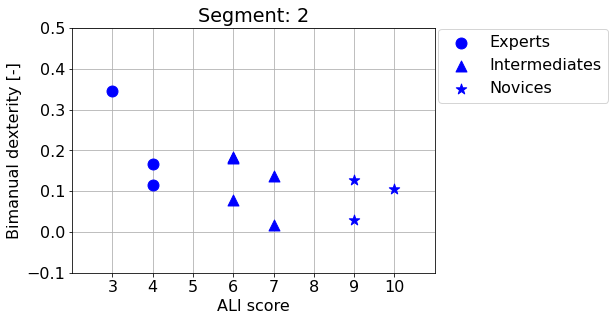

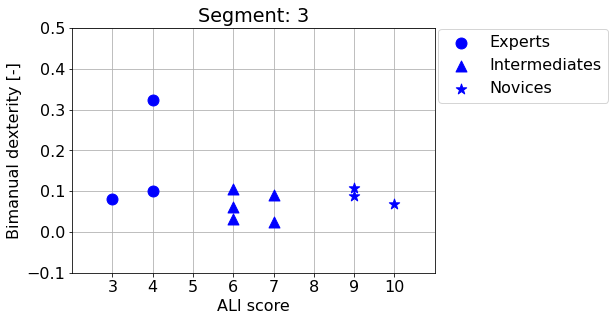

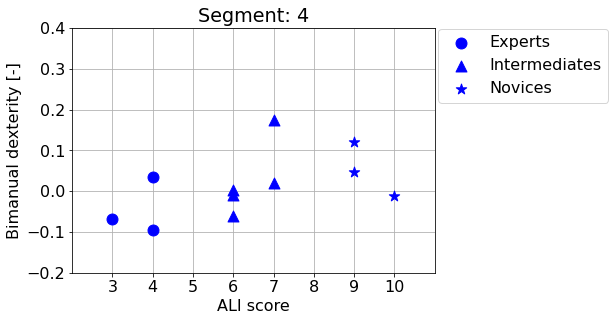

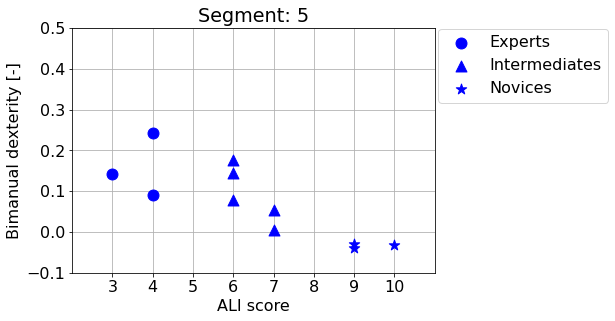

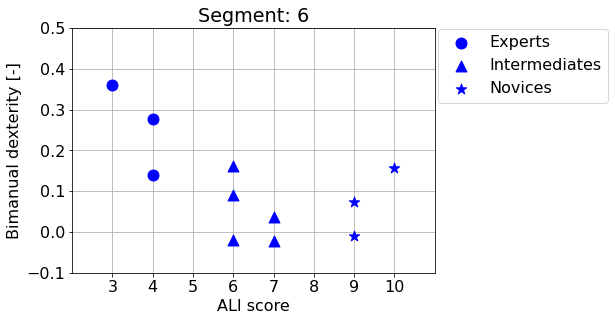

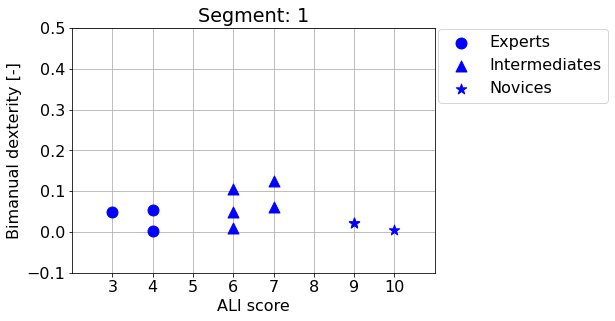

In [291]:

subject_order_novice = ['7','9','12']
ALI_novice = [9,9,10]
subject_order_intermediate = ['11','8','2','5','6']
ALI_intermediate = [6,6,6,7,7]
subject_order_expert = ['10','3','4']
ALI_expert = [3,4,4]

segment_new = [2,3,4,5,6,1]

for k, segment in enumerate(segment_list):
    y1 = []
    y2 = []
    y3 = []

    
    for subject in subject_order_expert:
        y1.append(mean_BD[subject][segment])
    for subject in subject_order_intermediate:
        y2.append(mean_BD[subject][segment])
    for subject in subject_order_novice:
        y3.append(mean_BD[subject][segment])     
    
    plt.figure(figsize=(6.5, 4.5))

    plt.scatter(ALI_expert, y1, s = 120 ,color='blue', marker = 'o', label ='Experts')
    plt.scatter(ALI_intermediate, y2, s = 120 ,color='blue', marker = '^', label = 'Intermediates')
    plt.scatter(ALI_novice, y3, s = 120 ,color='blue', marker = '*', label = 'Novices')


    plt.ylabel('Bimanual dexterity [-]')
    plt.xlabel('ALI score')
    plt.title('Segment: ' + str(segment_new[k]), fontdict=None, loc='center', pad=None)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.5, 1.03))
    ticks = [3,4,5,6,7,8,9,10]
    
    plt.xlim([2, 11])
    if segment == "530":
        plt.ylim([-0.2, 0.4])
    else:
        if segment == "560":
            plt.ylim([-0.1, 0.5])
        else:
            plt.ylim([-0.1, 0.5])
                
    #plt.ylim([0, max(max(y1),max(y2),max(y3))+15])
    #plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xticks(ticks=ticks, labels=ticks)
    
    plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_BD', 'BD_VS_ali_segment' + segment  +'.png'), bbox_inches='tight')
    #plt.savefig(join('..', 'data_exp',  'PLOTS','optitrack_BD','no_legend', 'BD_VS_ali_segment' + segment  +'.png'), bbox_inches='tight')


    plt.show()

## ANOVA BD

In [287]:
# create the data separating expertise for each channels
subject_order = ['10','3','4','8','11','2','5','6','7','9','12']
ALI_score = ['3','4','4','6','6','7','7','9','9','10']

novice_subjects = ['7','9','12']
intermediate_subjects = ['11','8','5','6','2']
expert_subjects = ['10','3','4']
category = ['Novice', 'Intermediate', 'Expert']



subject_expertise = {
    'Expert': expert_subjects,
    'Novice': novice_subjects,
    'Intermediate': intermediate_subjects
}


BD_segment_subject_expertise = {}
for segment in segment_list:
    BD_segment_subject_expertise[segment] = []

for segment in segment_list: 
    folder = join('..', 'data_exp' )
    rs_csv = join(folder,'ANOVA','optitrack','BD' + segment +'.csv')
    f = open(rs_csv, 'w') # open the file in the write mode                        
    # create the csv writer
    writer = csv.writer(f)
    header = ['category','value_BD']
    # write a row to the csv file
    writer.writerow(header)
    for cat in category:     
        for subject in subject_expertise[cat]:   
            for run in run_list[subject][segment]:
                BD_val = BD[subject][segment][run]
                
                row = [cat, BD_val]
                writer.writerow(row)
                BD_segment_subject_expertise[segment].append(row)
    f.close() 

    #met a la suite les valeurs des temps pour les runs des sujets avec la meme expertise, pour chaque segment
#print(time_segment_subject_expertise)

BD_expertise_dataframe = {}
for segment, values in BD_segment_subject_expertise.items():
    
    BD_expertise_dataframe[segment] = pd.DataFrame(values, columns=["category", "value_BD"])
#print( time_expertise_dataframe)
    
BD_anova_results = {}
for segment, dataframe in BD_expertise_dataframe.items():
    #perform one-way ANOVA
    model = ols('value_BD ~ C(category)', data=dataframe).fit()
    BD_anova_results[segment] = sm.stats.anova_lm(model, typ=2)
    print("segment: " + segment + " BD" )
    print(BD_anova_results[segment])
    print("\n")
print("-----------")
print("\n")





segment: 500 BD
               sum_sq    df         F    PR(>F)
C(category)  0.111795   2.0  2.589852  0.085937
Residual     0.992832  46.0       NaN       NaN


segment: 510 BD
               sum_sq    df         F    PR(>F)
C(category)  0.103555   2.0  4.882091  0.011845
Residual     0.498464  47.0       NaN       NaN


segment: 530 BD
               sum_sq    df         F    PR(>F)
C(category)  0.079971   2.0  1.905854  0.160011
Residual     0.986079  47.0       NaN       NaN


segment: 540 BD
               sum_sq    df         F    PR(>F)
C(category)  0.256458   2.0  9.693188  0.000316
Residual     0.595295  45.0       NaN       NaN


segment: 541 BD
               sum_sq    df          F    PR(>F)
C(category)  0.438054   2.0  10.277236  0.000204
Residual     0.980346  46.0        NaN       NaN


segment: 560 BD
               sum_sq    df         F    PR(>F)
C(category)  0.019587   2.0  2.725743  0.076562
Residual     0.158088  44.0       NaN       NaN


-----------




In [277]:
print(segment_list_optitrack)
print(segment_new_optitrack)

['500', '510', '530', '540', '541']
['2', '3', '4', '5', '6']
